<a href="https://colab.research.google.com/github/TonmoyTalukder/An-Empirical-Study-of-the-Efficacy-among-multiple-MachineLearning-Algorithms-for-Diabetes-Prediction/blob/main/An_Empirical_Study_of_the_Efficacy_among_multiple_Machine_Learning_Algorithms_for_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Empirical Study of the Efficacy among multiple Machine Learning Algorithms for Diabetes Prediction
## Pima Indians Diabetes Database

#### Author: [Tonmoy Talukder](https://tonmoy-talukder.web.app/)

*CS Udergrad, AUST, Dhaka, Bangladesh*

**Context:** This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


#Prerequisites

####Dataset
- Dataset CSV file drive link: https://drive.google.com/file/d/1-8BRMFRokaOsdpG8LXYo154MHyOJQNrc/view?usp=sharing

-  Dataset Source: **Kaggle** 
- Kaggle Link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

####Begining


Upload the dataset

In [ ]:
### Not Used Here ###

# # # Upload CSV File from Local Drive
# from google.colab import files
# uploaded = files.upload()

Import Libraries

In [ ]:
# Import Libraries 
import pandas as pd 
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score, classification_report

from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

Dataset Load and Display Information

In [ ]:
# Read CSV File
df_ = pd.read_csv("drive/MyDrive/Colab Notebooks/Datasets/diabetes.csv")

df = df_.copy()

# Display first 5 rows
display(df.head(5))

# Printing all columns name
print(df.columns)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Columns:** 
- Pregnancies : Number of pregnancies

- Glucose : 2-hour plasma glucose concentration in the oral glucose tolerance test

- Blood Pressure : Blood Pressure (Low blood pressure) (mmHg)

- SkinThickness : Skin Thickness

- Insulin : 2-hour serum insulin (mu U/ml)

- DiabetesPedigreeFunction : Function (2 hour plasma glucose concentration in oral glucose tolerance test)

- BMI : Body Mass Index

- Age : Age(year)

- Outcome : Have the disease (1) or not (0)

####Performimng MinMaxScaller

In [ ]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

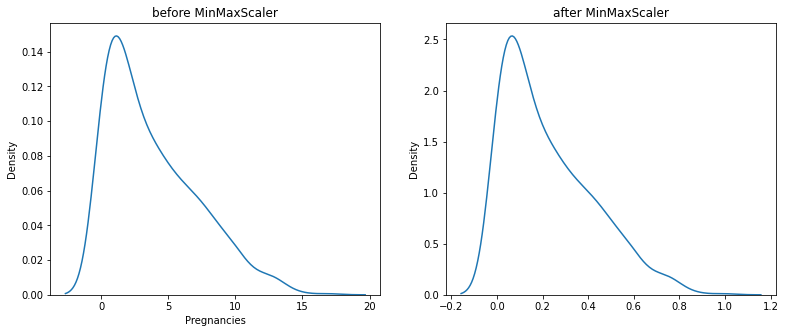

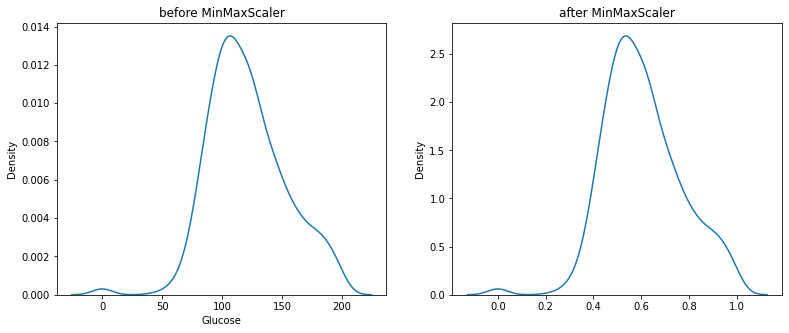

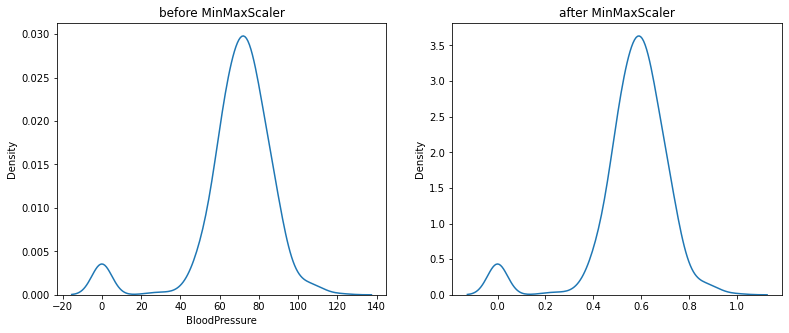

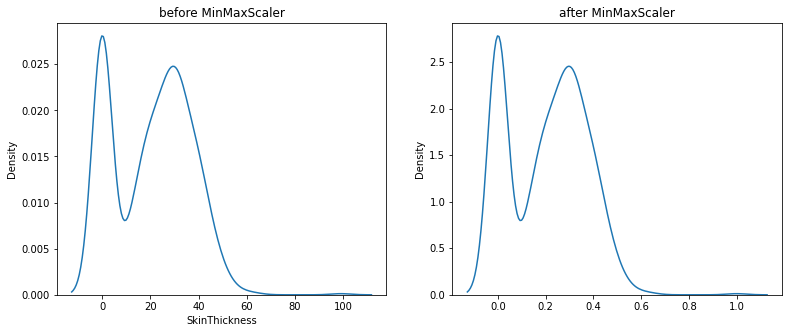

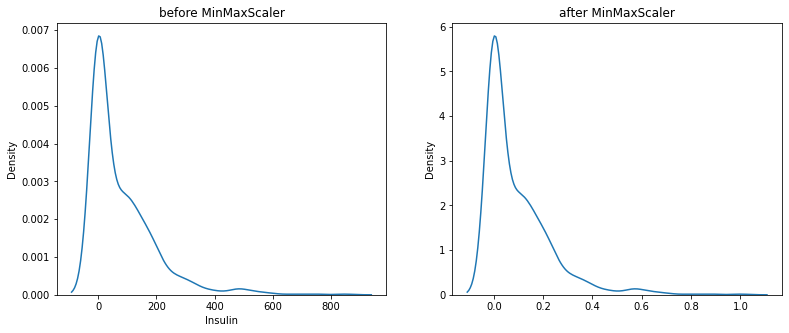

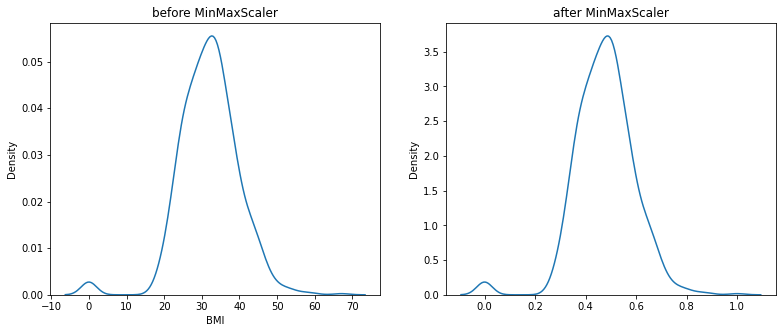

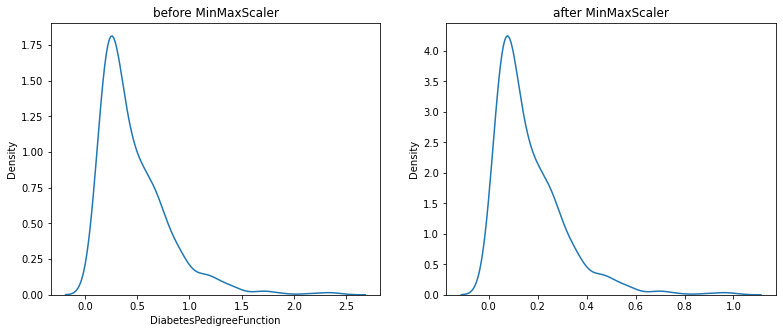

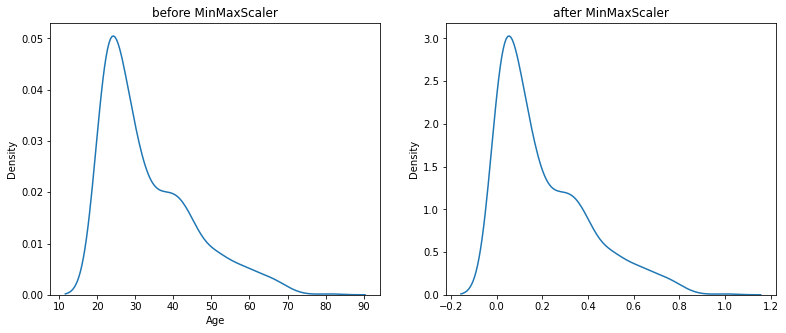

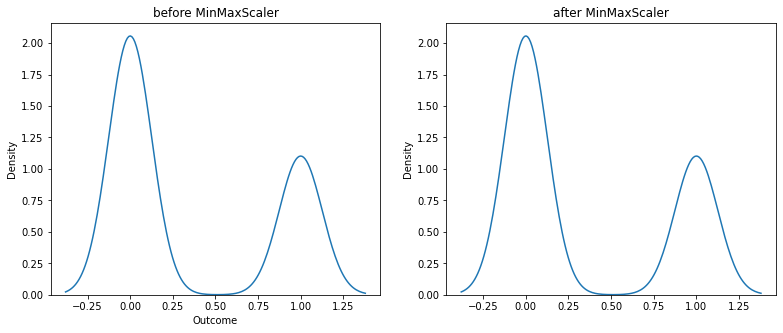

In [ ]:
for col in df.columns:
    plots(df, col, MinMaxScaler())

####Data Analysis

Dataset Observation

In [ ]:
# Shape and Number of rows and columns
print("Dataset Shape: ")
print(df.shape)
print("Number of Rows: ")
display(df.shape[0])
print("Number of Columns: ")
display(df.shape[1])
print("\n")

# Data Types
print("Data Types of the columns: ")
print(df.dtypes)
print("\n")

# Null Values Count
print("How much null values in the columns: ")
print(df.isnull().sum())

Dataset Shape: 
(768, 9)
Number of Rows: 


768

Number of Columns: 


9



Data Types of the columns: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


How much null values in the columns: 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Dataset Statistic

In [ ]:
# Dataset Statistics
print("Dataset Statistics: ")
display(df.describe())

Dataset Statistics: 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#Machine Learning

### Target variable

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Traditional Model Training
(with grid searches)

###Training: Logistic Regression

##### Prerequisites

In [ ]:
# Copy Dataset
df_lr = df.copy()

**Feature and target variable separation**

In [ ]:
X_lr = df_lr.drop('Outcome', axis=1)
y_lr = df_lr[['Outcome']]

print("Features:" ,X_lr.shape)
print("Targets:" ,y_lr.shape)

Features: (768, 8)
Targets: (768, 1)


**Train test separation**

In [ ]:
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, 
                                                    y_lr, 
                                                    test_size=0.1, 
                                                    random_state=22, stratify=y_lr)

print(X_lr_train.shape, X_lr_test.shape, y_lr_train.shape, y_lr_test.shape)

(691, 8) (77, 8) (691, 1) (77, 1)


######**Stratification**

In [ ]:
class_0_train = y_lr_train['Outcome'].value_counts().values[0]
class_1_train = y_lr_train['Outcome'].value_counts().values[1]

train_ratio = class_1_train/class_0_train
print("Train Ratio", np.round(train_ratio*100, 2),"%")

Train Ratio 53.56 %


In [ ]:
class_0_test = y_lr_test['Outcome'].value_counts().values[0]
class_1_test = y_lr_test['Outcome'].value_counts().values[1]

test_ratio = class_1_test/class_0_test
print("Test Ratio", np.round(test_ratio*100, 2),"%")

Test Ratio 54.0 %


######**Algorithm Training**

In [ ]:
# https://stackoverflow.com/questions/33116010/logisticregression-object-has-no-attributes

# import the class
import sklearn.linear_model as lm

model = lm.LogisticRegression()

# fit the model with data
model.fit(X_lr_train,y_lr_train)

LogisticRegression()

##### Prediction

In [ ]:
y_lr_pred = model.predict(X_lr_test)

# Prediction Comparison with the test data
y_lr_test['probability'] = np.round(model.predict_proba(X_lr_test)[:,1], 2)
y_lr_test['predicted_Outcome'] = y_lr_pred

display(y_lr_test.sample(10))

,Outcome,probability,predicted_Outcome
551,0,0.09,0
0,1,0.72,1
251,0,0.18,0
270,1,0.68,1
262,0,0.16,0
146,0,0.07,0
245,1,0.92,1
190,0,0.08,0
238,1,0.79,1
316,0,0.04,0


In [ ]:
test_lr = pd.concat([X_lr_test, y_lr_test], axis=1)
display(test_lr.sample(10))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,probability,predicted_Outcome
21,8,99,84,0,0,35.4,0.388,50,0,0.29,0
551,3,84,68,30,106,31.9,0.591,25,0,0.09,0
245,9,184,85,15,0,30.0,1.213,49,1,0.92,1
197,3,107,62,13,48,22.9,0.678,23,1,0.11,0
251,2,129,84,0,0,28.0,0.284,27,0,0.18,0
510,12,84,72,31,0,29.7,0.297,46,1,0.21,0
55,1,73,50,10,0,23.0,0.248,21,0,0.02,0
564,0,91,80,0,0,32.4,0.601,27,0,0.08,0
190,3,111,62,0,0,22.6,0.142,21,0,0.08,0
198,4,109,64,44,99,34.8,0.905,26,1,0.33,0


##### Confuision Matrix

In [ ]:
confusion_matrix_lr = confusion_matrix(y_lr_test['Outcome'], 
                                     y_lr_test['predicted_Outcome'])

print('confusion_matrix: \n', confusion_matrix_lr)

confusion_matrix: 
 [[45  5]
 [11 16]]


In [ ]:
#Outcome
y_lr_test['Outcome'].value_counts()

0    50
1    27
Name: Outcome, dtype: int64

In [ ]:
#Predicted Outcome
y_lr_test['predicted_Outcome'].value_counts()

0    56
1    21
Name: predicted_Outcome, dtype: int64

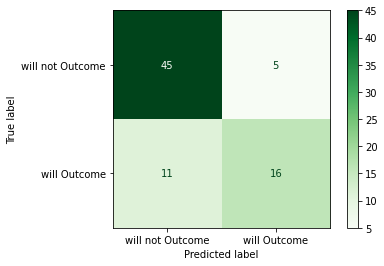

In [ ]:
plot_confusion_matrix(model, 
                      X_lr_test, 
                      y_lr_test['Outcome'], 
                      display_labels=["will not Outcome", "will Outcome"],
                      cmap='Greens')
plt.show()

###### True Positive Rate, True Negative Rate, False Positive Rate & False Negative Rate

In [ ]:
TN_lr = confusion_matrix_lr[0,0]
print("True Negatives = ", TN_lr)

FN_lr = confusion_matrix_lr[1,0]
print("False Negatives = ", FN_lr)

FP_lr = confusion_matrix_lr[0,1]
print("False Positives = ", FP_lr)

TP_lr = confusion_matrix_lr[1,1]
print("True Positives = ", TP_lr)

True Negatives =  45
False Negatives =  11
False Positives =  5
True Positives =  16


In [ ]:
TPR = np.round(TP_lr / (TP_lr + FN_lr), 2)
TNR = np.round(TN_lr / (TN_lr + FP_lr), 2)
FPR = np.round(FP_lr / (FP_lr + TN_lr), 2)
FNR = np.round(FN_lr / (FP_lr + TN_lr), 2)
 
print("True Positive Rate = ", TPR*100,"%") #Higher Better
print("True Negative Rate = ", TNR*100,"%")
print("False Positive Rate = ", FPR*100,"%") # Lower Better
print("False Negative Rate = ", FNR*100,"%")

True Positive Rate =  59.0 %
True Negative Rate =  90.0 %
False Positive Rate =  10.0 %
False Negative Rate =  22.0 %


##### Performance metric



In [ ]:
accuracy_lr = accuracy_score(y_lr_test['Outcome'], 
                           y_lr_test['predicted_Outcome'])
precision_lr = np.round(precision_score(y_lr_test['Outcome'], 
                                      y_lr_test['predicted_Outcome']), 2)
recall_lr = np.round(recall_score(y_lr_test['Outcome'], 
                                y_lr_test['predicted_Outcome']), 2)
f1_score_lr = np.round(f1_score(y_lr_test['Outcome'], 
                               y_lr_test['predicted_Outcome']), 2)
HarmonicMean_lr = (2*precision_lr*recall_lr)/(precision_lr+recall_lr)
Specificity_lr = TN_lr/(TN_lr+FP_lr)

print('Accuracy = ', np.round(accuracy_lr*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_lr*100, 2),"%") #Higher Better
print("Recall = ", recall_lr*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_lr*100, 2),"%") #Higher Better
print("Harmonic Mean = ", np.round(HarmonicMean_lr*100, 2),"%") #Higher Better
print("Specificity = ", np.round(Specificity_lr*100, 2),"%") #Higher Better

Accuracy =  79.22 %
Precision =  76.0 %
Recall =  59.0 %
f1 score =  67.0 %
Harmonic Mean =  66.43 %
Specificity =  90.0 %


######Classification report

In [ ]:
print(classification_report(y_lr_test['Outcome'], y_lr_test['predicted_Outcome']))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        50
           1       0.76      0.59      0.67        27

    accuracy                           0.79        77
   macro avg       0.78      0.75      0.76        77
weighted avg       0.79      0.79      0.79        77



######**ROC-AUC**

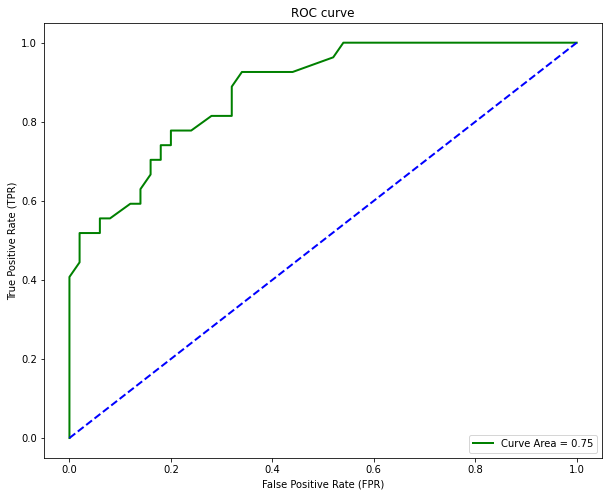

In [ ]:
FPR, TPR, thr = roc_curve(y_lr_test['Outcome'], 
                          y_lr_test['probability'])
auc_lr = np.round(roc_auc_score(y_lr_test['Outcome'], 
                             y_lr_test['predicted_Outcome']), 2)

plt.figure(figsize=(10, 8))
plt.plot(FPR, 
         TPR, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc_lr))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": FPR, "TPR": TPR})
display(roc_data.head())

,threshold,FPR,TPR
0,1.92,0.0,0.000000
1,0.92,0.0,0.037037
2,0.72,0.0,0.296296
3,0.71,0.0,0.370370
4,0.69,0.0,0.407407


#### Grid Search and Cross Validation



In [ ]:
model = lm.LogisticRegression()

print(model.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [ ]:
## THIS BLOCK SHOULD CHECK

parameters = {'criterion': ['gini'],
              'max_depth': [None],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'min_samples_split': [2, 9, 10, 11]}

# def LogisticR_penalty():    
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

grid_values = {'penalty': ['l1', 'l2', 'elasticnet', None], 'class_weight': ['dict', 'balanced', None], 'C': [0.1], 'random_state': [22]}

model = lm.LogisticRegression()

# from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model,
                           param_grid = grid_values,
                           scoring="f1",
                           cv=10,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_lr_train, y_lr_train)

In [ ]:
y_lr_pred = np.round(grid_result.predict(X_lr_test), 2)

In [ ]:
#Best hyperparameters in the grid search
grid_result.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': 22}

In [ ]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.615385,0.654545,0.600000,0.714286,0.679245,0.659805,0.069224,1
1,0.619048,0.622222,0.585366,0.705882,0.697674,0.631709,0.071983,2
9,0.619048,0.622222,0.585366,0.705882,0.697674,0.631709,0.071983,2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


Index(['split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


##### Model performance evaluation with the best found model in grid search and cross-validation

######Confuision Matrix

In [ ]:
confusion_matrix_lr_gscv = confusion_matrix(y_lr_test['Outcome'], y_lr_pred)
print('confusion_matrix: \n', confusion_matrix_lr_gscv)

confusion_matrix: 
 [[40 10]
 [ 7 20]]


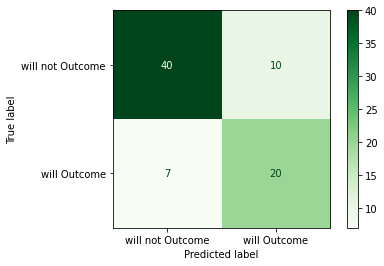

In [ ]:
plot_confusion_matrix(grid_result, 
                      X_lr_test,
                      y_lr_test['Outcome'], 
                      display_labels=["will not Outcome", "will Outcome"],
                      cmap='Greens')
plt.show()

In [ ]:
TN_lr_gscv = confusion_matrix_lr_gscv[0,0]
print("True Negatives = ", TN_lr_gscv)

FN_lr_gscv = confusion_matrix_lr_gscv[1,0]
print("False Negatives = ", FN_lr_gscv)

FP_lr_gscv = confusion_matrix_lr_gscv[0,1]
print("False Positives = ", FP_lr_gscv)

TP_lr_gscv = confusion_matrix_lr_gscv[1,1]
print("True Positives = ", TP_lr_gscv)

True Negatives =  40
False Negatives =  7
False Positives =  10
True Positives =  20


##### Performance metric

In [ ]:
accuracy_lr_gscv = np.round(accuracy_score(y_lr_test['Outcome'], 
                           y_lr_pred), 2)
precision_lr_gscv = np.round(precision_score(y_lr_test['Outcome'], 
                                      y_lr_pred), 2)
recall_lr_gscv = np.round(recall_score(y_lr_test['Outcome'], 
                                y_lr_pred), 2)
f1_score_lr_gscv = np.round(f1_score(y_lr_test['Outcome'], 
                               y_lr_pred), 2)
HarmonicMean_lr_gscv = (2*precision_lr_gscv*recall_lr_gscv)/(precision_lr_gscv+recall_lr_gscv)
Specificity_lr_gscv = TN_lr_gscv/(TN_lr_gscv+FP_lr_gscv)

print('Accuracy = ', np.round(accuracy_lr_gscv*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_lr_gscv*100, 2),"%") #Higher Better
print("Recall = ", recall_lr_gscv*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_lr_gscv*100, 2),"%") #Higher Better
print("Harmonic Mean = ", np.round(HarmonicMean_lr_gscv*100, 2),"%") #Higher Better
print("Specificity = ", np.round(Specificity_lr_gscv*100, 2),"%") #Higher Better

Accuracy =  78.0 %
Precision =  67.0 %
Recall =  74.0 %
f1 score =  70.0 %
Harmonic Mean =  70.33 %
Specificity =  80.0 %


######Classification report

In [ ]:
print(classification_report(y_lr_test['Outcome'], y_lr_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        50
           1       0.67      0.74      0.70        27

    accuracy                           0.78        77
   macro avg       0.76      0.77      0.76        77
weighted avg       0.79      0.78      0.78        77



######**ROC-AUC**

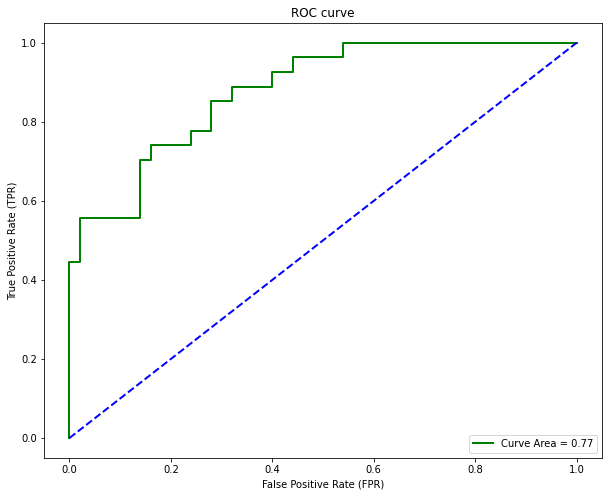

In [ ]:
FPR, TPR, thr = roc_curve(y_lr_test['Outcome'], grid_result.predict_proba(X_lr_test)[:,1])

auc_lr_gscv = np.round(roc_auc_score(y_lr_test['Outcome'], y_lr_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(FPR, 
         TPR, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc_lr_gscv))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": FPR, "TPR": TPR})
display(roc_data.head())

,threshold,FPR,TPR
0,1.940823,0.00,0.000000
1,0.940823,0.00,0.037037
2,0.797951,0.00,0.444444
3,0.787523,0.02,0.444444
4,0.737839,0.02,0.555556


### Training: Decision Tree Classifier

##### Prerequisites

In [ ]:
# Copy Dataset
df_dtc = df.copy()

**Feature and target variable separation**

In [ ]:
X_dtc = df_dtc.drop('Outcome', axis=1)
y_dtc = df_dtc[['Outcome']]

print("Features:" ,X_dtc.shape)
print("Targets:" ,y_dtc.shape)

Features: (768, 8)
Targets: (768, 1)


**Train test separation**

In [ ]:
X_dtc_train, X_dtc_test, y_dtc_train, y_dtc_test = train_test_split(X_dtc, 
                                                    y_dtc, 
                                                    test_size=0.1, 
                                                    random_state=22, stratify=y_dtc)

print(X_dtc_train.shape, X_dtc_test.shape, y_dtc_train.shape, y_dtc_test.shape)

(691, 8) (77, 8) (691, 1) (77, 1)


**Stratification**

In [ ]:
class_0_train = y_dtc_train['Outcome'].value_counts().values[0]
class_1_train = y_dtc_train['Outcome'].value_counts().values[1]

train_ratio = class_1_train/class_0_train
print("Train Ratio", np.round(train_ratio*100, 2),"%")

Train Ratio 53.56 %


In [ ]:
class_0_test = y_dtc_test['Outcome'].value_counts().values[0]
class_1_test = y_dtc_test['Outcome'].value_counts().values[1]

test_ratio = class_1_test/class_0_test
print("Test Ratio", np.round(test_ratio*100, 2),"%")

Test Ratio 54.0 %


**Algorithm Training**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model = model.fit(X_dtc_train, y_dtc_train)

##### Tree Diagram

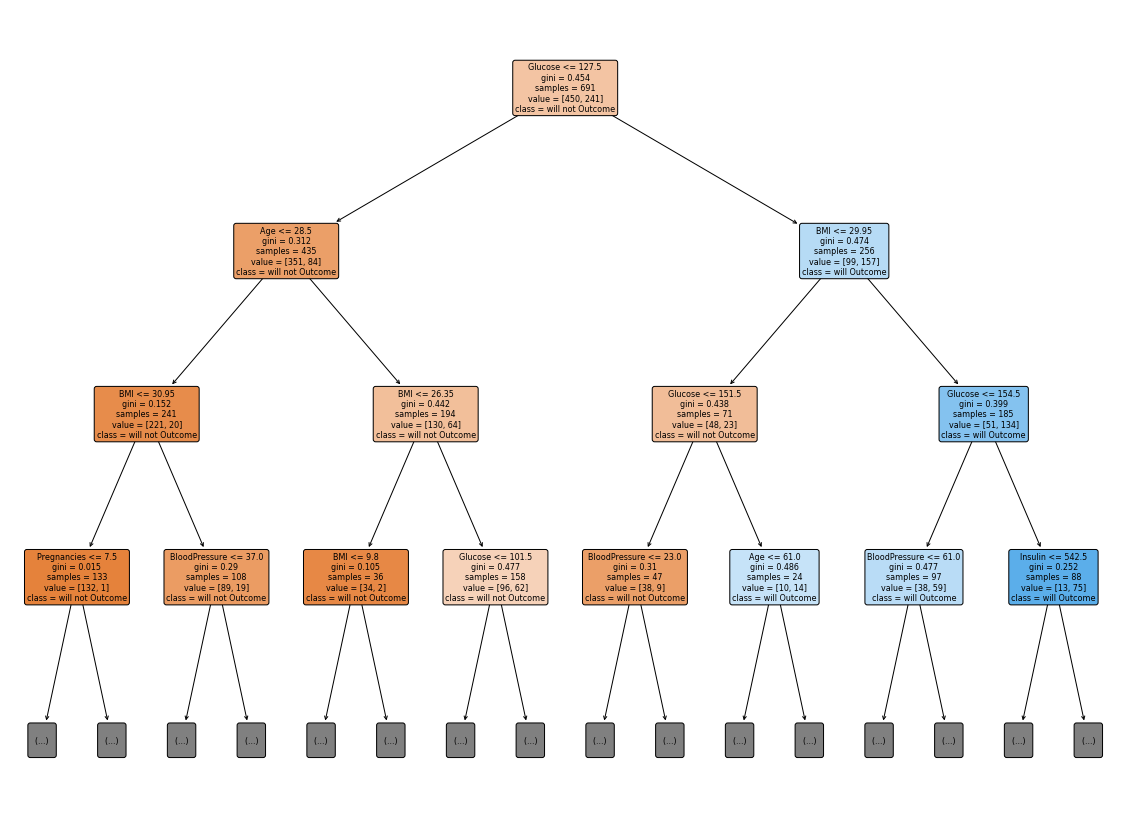

In [ ]:
plt.figure(figsize = (20, 15))
from sklearn.tree import plot_tree
plot_tree(model, 
          filled=True,
          rounded=True,
          class_names = ["will not Outcome", "will Outcome"],
          feature_names = X_dtc.columns,
          max_depth=3,
          fontsize=8)

plt.show()

##### Prediction

In [ ]:
y_dtc_pred = model.predict(X_dtc_test)

# Prediction Comparison with the test data
y_dtc_test['probability'] = np.round(model.predict_proba(X_dtc_test)[:,1], 2)
y_dtc_test['predicted_Outcome'] = y_dtc_pred

display(y_dtc_test.sample(10))

,Outcome,probability,predicted_Outcome
750,1,0.0,0
316,0,0.0,0
755,1,1.0,1
225,0,0.0,0
165,1,0.0,0
66,1,0.0,0
245,1,1.0,1
608,0,0.0,0
553,0,0.0,0
133,0,0.0,0


In [ ]:
test_dtc = pd.concat([X_dtc_test, y_dtc_test], axis=1)
display(test_dtc.sample(10))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,probability,predicted_Outcome
600,1,108,88,19,0,27.1,0.400,24,0,0.0,0
0,6,148,72,35,0,33.6,0.627,50,1,1.0,1
317,3,182,74,0,0,30.5,0.345,29,1,1.0,1
180,6,87,80,0,0,23.2,0.084,32,0,0.0,0
262,4,95,70,32,0,32.1,0.612,24,0,1.0,1
470,1,144,82,40,0,41.3,0.607,28,0,0.0,0
52,5,88,66,21,23,24.4,0.342,30,0,0.0,0
238,9,164,84,21,0,30.8,0.831,32,1,1.0,1
33,6,92,92,0,0,19.9,0.188,28,0,0.0,0
165,6,104,74,18,156,29.9,0.722,41,1,0.0,0


##### Confuision Matrix

In [ ]:
confusion_matrix_dtc = confusion_matrix(y_dtc_test['Outcome'], 
                                     y_dtc_test['predicted_Outcome'])

print('confusion_matrix: \n', confusion_matrix_dtc)

confusion_matrix: 
 [[42  8]
 [10 17]]


In [ ]:
#Outcome
y_dtc_test['Outcome'].value_counts()

0    50
1    27
Name: Outcome, dtype: int64

In [ ]:
#Predicted Outcome
y_dtc_test['predicted_Outcome'].value_counts()

0    52
1    25
Name: predicted_Outcome, dtype: int64

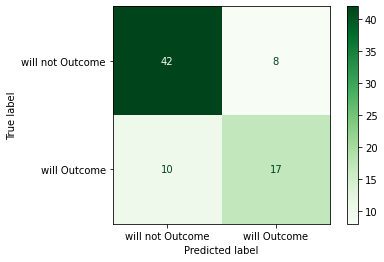

In [ ]:
plot_confusion_matrix(model, 
                      X_dtc_test, 
                      y_dtc_test['Outcome'], 
                      display_labels=["will not Outcome", "will Outcome"],
                      cmap='Greens')
plt.show()

###### True Positive Rate, True Negative Rate, False Positive Rate & False Negative Rate

In [ ]:
TN_dtc = confusion_matrix_dtc[0,0]
print("True Negatives = ", TN_dtc)

FN_dtc = confusion_matrix_dtc[1,0]
print("False Negatives = ", FN_dtc)

FP_dtc = confusion_matrix_dtc[0,1]
print("False Positives = ", FP_dtc)

TP_dtc = confusion_matrix_dtc[1,1]
print("True Positives = ", TP_dtc)

True Negatives =  42
False Negatives =  10
False Positives =  8
True Positives =  17


In [ ]:
TPR = np.round(TP_dtc / (TP_dtc + FN_dtc), 2)
TNR = np.round(TN_dtc / (TN_dtc + FP_dtc), 2)
FPR = np.round(FP_dtc / (FP_dtc + TN_dtc), 2)
FNR = np.round(FN_dtc / (FP_dtc + TN_dtc), 2)
 
print("True Positive Rate = ", TPR*100,"%") #Higher Better
print("True Negative Rate = ", TNR*100,"%")
print("False Positive Rate = ", FPR*100,"%") # Lower Better
print("False Negative Rate = ", FNR*100,"%")

True Positive Rate =  63.0 %
True Negative Rate =  84.0 %
False Positive Rate =  16.0 %
False Negative Rate =  20.0 %


##### Performance metric

In [ ]:
accuracy_dtc = accuracy_score(y_dtc_test['Outcome'], 
                           y_dtc_test['predicted_Outcome'])
precision_dtc = np.round(precision_score(y_dtc_test['Outcome'], 
                                      y_dtc_test['predicted_Outcome']), 2)
recall_dtc = np.round(recall_score(y_dtc_test['Outcome'], 
                                y_dtc_test['predicted_Outcome']), 2)
f1_score_dtc = np.round(f1_score(y_dtc_test['Outcome'], 
                               y_dtc_test['predicted_Outcome']), 2)
HarmonicMean_dtc = (2*precision_dtc*recall_dtc)/(precision_dtc + recall_dtc)
Specificity_dtc = TN_dtc/(TN_dtc+FP_dtc)

print('Accuracy = ', np.round(accuracy_dtc*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_dtc*100, 2),"%") #Higher Better
print("Recall = ", recall_dtc*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_dtc*100, 2),"%") #Higher Better
print("Harmonic Mean = ", np.round(HarmonicMean_dtc*100, 2),"%") #Higher Better
print("Specificity = ", np.round(Specificity_dtc*100, 2),"%") #Higher Better

Accuracy =  76.62 %
Precision =  68.0 %
Recall =  63.0 %
f1 score =  65.0 %
Harmonic Mean =  65.4 %
Specificity =  84.0 %


######Classification report

In [ ]:
print(classification_report(y_dtc_test['Outcome'], y_dtc_test['predicted_Outcome']))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        50
           1       0.68      0.63      0.65        27

    accuracy                           0.77        77
   macro avg       0.74      0.73      0.74        77
weighted avg       0.76      0.77      0.76        77



######**ROC-AUC**

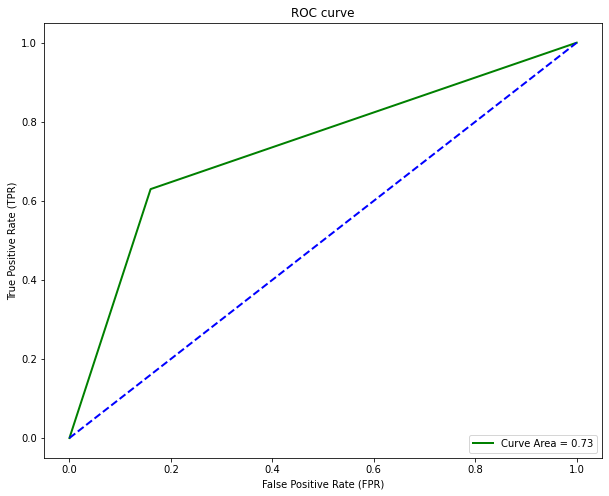

In [ ]:
FPR, TPR, thr = roc_curve(y_dtc_test['Outcome'], 
                          y_dtc_test['probability'])
auc_dtc = np.round(roc_auc_score(y_dtc_test['Outcome'], 
                             y_dtc_test['predicted_Outcome']), 2)

plt.figure(figsize=(10, 8))
plt.plot(FPR, 
         TPR, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc_dtc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": FPR, "TPR": TPR})
display(roc_data)

,threshold,FPR,TPR
0,2.0,0.00,0.00000
1,1.0,0.16,0.62963
2,0.0,1.00,1.00000


#### Grid Search and Cross Validation

In [ ]:
parameters = {'criterion': ['gini'],
              'max_depth': [None],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'min_samples_split': [2, 9, 10, 11]}

model = DecisionTreeClassifier(random_state=22)

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="f1",
                           cv=10,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_dtc_train, y_dtc_train)

**Hyperparameters for grid search in each iteration**

- iteration 1: criterion='gini', max_depth=3
- iteration 2: criterion='gini', max_depth=4
- iteration 3: criterion='gini', max_depth=5
- iteration 4: criterion='gini', max_depth=6
- iteration 5: criterion='gini', max_depth=7
- iteration 6: criterion='entropy', max_depth=3
- iteration 7: criterion='entropy', max_depth=4
- iteration 8: criterion='entropy', max_depth=5
- iteration 9: criterion='entropy', max_depth=6
- iteration 10: criterion='entropy', max_depth=7

In [ ]:
y_dtc_pred = np.round(grid_result.predict(X_dtc_test), 2)

In [ ]:
#Best hyperparameters in the grid search
grid_result.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_split': 11}

In [ ]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,gini,None,0.458333,0.711111,0.604651,0.612245,0.653846,0.571798,0.089335,1
1,gini,None,0.428571,0.627451,0.600000,0.566038,0.490566,0.566359,0.091791,2
5,gini,None,0.428571,0.627451,0.600000,0.566038,0.490566,0.566359,0.091791,2
3,gini,None,0.500000,0.500000,0.730769,0.500000,0.612245,0.561311,0.083167,4
7,gini,None,0.500000,0.500000,0.730769,0.500000,0.612245,0.561311,0.083167,4
0,gini,None,0.400000,0.538462,0.511628,0.603175,0.538462,0.536848,0.080450,6
4,gini,None,0.400000,0.538462,0.511628,0.603175,0.538462,0.536848,0.080450,6
12,gini,None,0.416667,0.410256,0.653846,0.481481,0.588235,0.535049,0.088053,8
2,gini,None,0.378378,0.487805,0.666667,0.541667,0.372093,0.529993,0.094139,9
6,gini,None,0.378378,0.487805,0.666667,0.541667,0.372093,0.529993,0.094139,9


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


##### Model performance evaluation with the best found model in grid search and cross-validation

######Confuision Matrix

In [ ]:
confusion_matrix_dtc_gscv = confusion_matrix(y_dtc_test['Outcome'], y_dtc_pred)
print('confusion_matrix: \n', confusion_matrix_dtc_gscv)

confusion_matrix: 
 [[45  5]
 [ 9 18]]


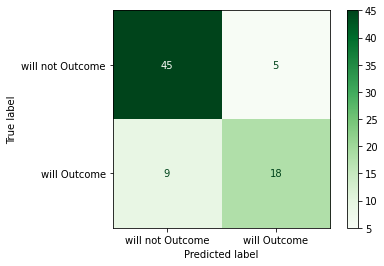

In [ ]:
plot_confusion_matrix(grid_result, 
                      X_dtc_test,
                      y_dtc_test['Outcome'], 
                      display_labels=["will not Outcome", "will Outcome"],
                      cmap='Greens')
plt.show()

In [ ]:
TN_dtc_gscv = confusion_matrix_dtc_gscv[0,0]
print("True Negatives = ", TN_dtc_gscv)

FN_dtc_gscv = confusion_matrix_dtc_gscv[1,0]
print("False Negatives = ", FN_dtc_gscv)

FP_dtc_gscv = confusion_matrix_dtc_gscv[0,1]
print("False Positives = ", FP_dtc_gscv)

TP_dtc_gscv = confusion_matrix_dtc_gscv[1,1]
print("True Positives = ", TP_dtc_gscv)

True Negatives =  45
False Negatives =  9
False Positives =  5
True Positives =  18


##### Performance metric

In [ ]:
accuracy_dtc_gscv = np.round(accuracy_score(y_dtc_test['Outcome'], 
                           y_dtc_pred), 2)
precision_dtc_gscv = np.round(precision_score(y_dtc_test['Outcome'], 
                                      y_dtc_pred), 2)
recall_dtc_gscv = np.round(recall_score(y_dtc_test['Outcome'], 
                                y_dtc_pred), 2)
f1_score_dtc_gscv = np.round(f1_score(y_dtc_test['Outcome'], 
                               y_dtc_pred), 2)
HarmonicMean_dtc_gscv = (2*precision_dtc*recall_dtc_gscv)/(precision_dtc + recall_dtc_gscv)
Specificity_dtc_gscv = TN_dtc_gscv/(TN_dtc_gscv+FP_dtc_gscv)

print('Accuracy = ', np.round(accuracy_dtc*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_dtc*100, 2),"%") #Higher Better
print("Recall = ", recall_dtc*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_dtc*100, 2),"%") #Higher Better
print("Harmonic Mean = ", np.round(HarmonicMean_dtc*100, 2),"%") #Higher Better
print("Specificity = ", np.round(Specificity_dtc*100, 2),"%") #Higher Better

Accuracy =  76.62 %
Precision =  68.0 %
Recall =  63.0 %
f1 score =  65.0 %
Harmonic Mean =  65.4 %
Specificity =  84.0 %


######Classification report

In [ ]:
print(classification_report(y_dtc_test['Outcome'], y_dtc_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87        50
           1       0.78      0.67      0.72        27

    accuracy                           0.82        77
   macro avg       0.81      0.78      0.79        77
weighted avg       0.82      0.82      0.81        77



######**ROC-AUC**

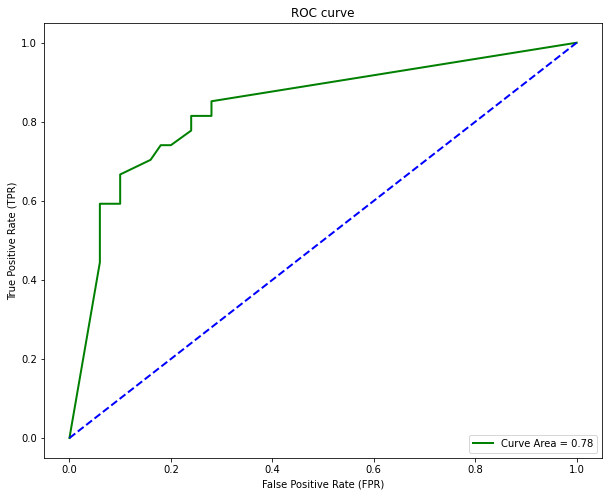

In [ ]:
FPR, TPR, thr = roc_curve(y_dtc_test['Outcome'], grid_result.predict_proba(X_dtc_test)[:,1])

auc_dtc_gscv = np.round(roc_auc_score(y_dtc_test['Outcome'], y_dtc_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(FPR, 
         TPR, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc_dtc_gscv))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": FPR, "TPR": TPR})
display(roc_data)

,threshold,FPR,TPR
0,2.000000,0.00,0.000000
1,1.000000,0.06,0.444444
2,0.875000,0.06,0.518519
3,0.777778,0.06,0.592593
4,0.666667,0.10,0.592593
5,0.555556,0.10,0.666667
6,0.500000,0.16,0.703704
7,0.400000,0.18,0.740741
8,0.375000,0.20,0.740741
9,0.333333,0.24,0.777778


###Training: Support Vector Machine SVM

##### Prerequisites

In [ ]:
# Copy Dataset
df_svm = df.copy()

**Feature and target variable separation**

In [ ]:
X_svm = df_svm.drop('Outcome', axis=1)
y_svm = df_svm[['Outcome']]

print("Features:" ,X_svm.shape)
print("Targets:" ,y_svm.shape)

Features: (768, 8)
Targets: (768, 1)


**Train test separation**

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X_svm, 
                                                    y_svm, 
                                                    test_size=0.1, 
                                                    random_state=22, stratify=y_svm)

print(X_svm_train.shape, X_svm_test.shape, y_svm_train.shape, y_svm_test.shape)

(691, 8) (77, 8) (691, 1) (77, 1)


**Algorithm Training**

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
model = svm.SVC(kernel='linear', probability=True) # Linear Kernel
# gamma = 0.001, C = 1000

#Train the model using the training sets
model.fit(X_svm_train, y_svm_train)

SVC(kernel='linear', probability=True)

##### Prediction

In [ ]:
y_svm_pred = model.predict(X_svm_test)

# Prediction Comparison with the test data
y_svm_test['probability'] = np.round(model.predict_proba(X_svm_test)[:,1], 2)
y_svm_test['predicted_Outcome'] = y_svm_pred

display(y_svm_test.sample(10))

,Outcome,probability,predicted_Outcome
564,0,0.10,0
219,1,0.38,0
516,1,0.57,1
165,1,0.22,0
211,0,0.53,1
136,0,0.12,0
316,0,0.06,0
465,0,0.13,0
750,1,0.49,0
410,0,0.24,0


In [ ]:
test_svm = pd.concat([X_svm_test, y_svm_test], axis=1)
display(test_svm.sample(10))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,probability,predicted_Outcome
383,1,90,62,18,59,25.1,1.268,25,0,0.10,0
316,3,99,80,11,64,19.3,0.284,30,0,0.06,0
645,2,157,74,35,440,39.4,0.134,30,0,0.56,1
270,10,101,86,37,0,45.6,1.136,38,1,0.60,1
643,4,90,0,0,0,28.0,0.610,31,0,0.25,0
571,2,130,96,0,0,22.6,0.268,21,0,0.13,0
477,7,114,76,17,110,23.8,0.466,31,0,0.18,0
225,1,87,78,27,32,34.6,0.101,22,0,0.08,0
600,1,108,88,19,0,27.1,0.400,24,0,0.10,0
238,9,164,84,21,0,30.8,0.831,32,1,0.74,1


##### Confuision Matrix

In [ ]:
confusion_matrix_svm = confusion_matrix(y_svm_test['Outcome'], 
                                     y_svm_test['predicted_Outcome'])

print('confusion_matrix: \n', confusion_matrix_svm)

confusion_matrix: 
 [[45  5]
 [12 15]]


In [ ]:
#Outcome
y_svm_test['Outcome'].value_counts()

0    50
1    27
Name: Outcome, dtype: int64

In [ ]:
#Predicted Outcome
y_svm_test['predicted_Outcome'].value_counts()

0    57
1    20
Name: predicted_Outcome, dtype: int64

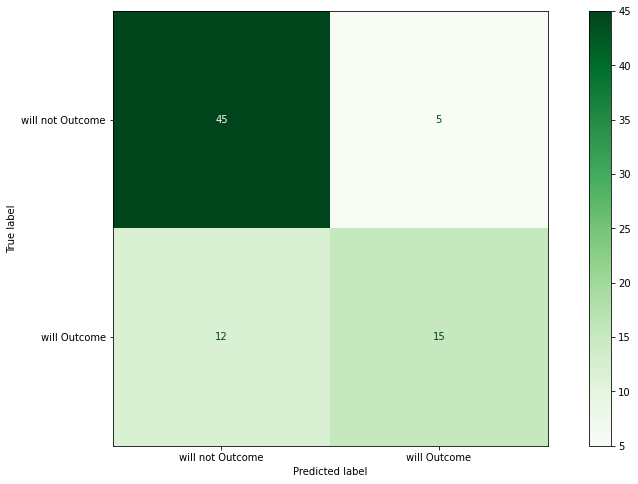

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
# plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(model, 
                      X_svm_test, 
                      y_svm_test['Outcome'], 
                      display_labels=["will not Outcome", "will Outcome"],
                      cmap='Greens',
                     ax = ax)
plt.show()

###### True Positive Rate, True Negative Rate, False Positive Rate & False Negative Rate

In [ ]:
TN_svm = confusion_matrix_svm[0,0]
print("True Negatives = ", TN_svm)

FN_svm = confusion_matrix_svm[1,0]
print("False Negatives = ", FN_svm)

FP_svm = confusion_matrix_svm[0,1]
print("False Positives = ", FP_svm)

TP_svm = confusion_matrix_svm[1,1]
print("True Positives = ", TP_svm)

True Negatives =  45
False Negatives =  12
False Positives =  5
True Positives =  15


In [ ]:
TPR = np.round(TP_svm / (TP_svm + FN_svm), 2)
TNR = np.round(TN_svm / (TN_svm + FP_svm), 2)
FPR = np.round(FP_svm / (FP_svm + TN_svm), 2)
FNR = np.round(FN_svm / (FP_svm + TN_svm), 2)
 
print("True Positive Rate = ", TPR*100,"%") #Higher Better
print("True Negative Rate = ", TNR*100,"%")
print("False Positive Rate = ", FPR*100,"%") # Lower Better
print("False Negative Rate = ", FNR*100,"%")

True Positive Rate =  56.00000000000001 %
True Negative Rate =  90.0 %
False Positive Rate =  10.0 %
False Negative Rate =  24.0 %


##### Performance metric

In [ ]:
accuracy_svm = accuracy_score(y_svm_test['Outcome'], 
                           y_svm_test['predicted_Outcome'])
precision_svm = np.round(precision_score(y_svm_test['Outcome'], 
                                      y_svm_test['predicted_Outcome']), 2)
recall_svm = np.round(recall_score(y_svm_test['Outcome'], 
                                y_svm_test['predicted_Outcome']), 2)
f1_score_svm = np.round(f1_score(y_svm_test['Outcome'], 
                               y_svm_test['predicted_Outcome']), 2)
HarmonicMean_svm = (2*precision_svm*recall_svm)/(precision_svm+recall_svm)
Specificity_svm = TN_svm/(TN_svm+FP_svm)

print('Accuracy = ', np.round(accuracy_svm*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_svm*100, 2),"%") #Higher Better
print("Recall = ", recall_svm*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_svm*100, 2),"%") #Higher Better
print("Harmonic Mean = ", np.round(HarmonicMean_svm*100, 2),"%") #Higher Better
print("Specificity = ", np.round(Specificity_svm*100, 2),"%") #Higher Better

Accuracy =  77.92 %
Precision =  75.0 %
Recall =  56.00000000000001 %
f1 score =  64.0 %
Harmonic Mean =  64.12 %
Specificity =  90.0 %


######Classification report

In [ ]:
print(classification_report(y_svm_test['Outcome'], y_svm_test['predicted_Outcome']))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        50
           1       0.75      0.56      0.64        27

    accuracy                           0.78        77
   macro avg       0.77      0.73      0.74        77
weighted avg       0.78      0.78      0.77        77



######**ROC-AUC**

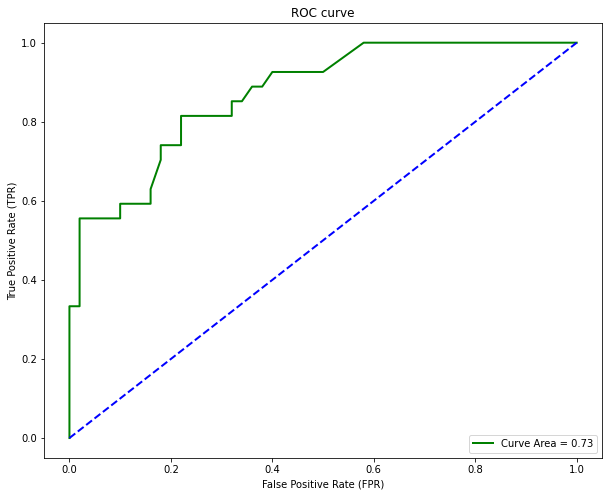

In [ ]:
FPR, TPR, thr = roc_curve(y_svm_test['Outcome'], 
                          y_svm_test['probability'])
auc_svm = np.round(roc_auc_score(y_svm_test['Outcome'], 
                             y_svm_test['predicted_Outcome']), 2)

plt.figure(figsize=(10, 8))
plt.plot(FPR, 
         TPR, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc_svm))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": FPR, "TPR": TPR})
display(roc_data.head())

,threshold,FPR,TPR
0,1.87,0.0,0.000000
1,0.87,0.0,0.037037
2,0.72,0.0,0.222222
3,0.71,0.0,0.296296
4,0.70,0.0,0.333333


#### Grid Search and Cross Validation

In [ ]:
model = svm.SVC(kernel='linear', probability=True) # Linear Kernel

print(model.get_params().keys())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

grid_values = {'classifier__C':[1, 10, 100],
              'classifier__gamma':[0.001, 0.0001]}

model = svm.SVC(kernel='linear', probability=True)

steps=[('classifier', svm.SVC(decision_function_shape="ovo", degree=3, gamma="auto", kernel="rbf", max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False))]

pipeline = Pipeline(steps)

# from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipeline,
                           param_grid = grid_values,
                           scoring="f1",
                           cv=10)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_svm_train, y_svm_train)

In [ ]:
y_svm_pred = np.round(grid_result.predict(X_svm_test), 2)

In [ ]:
#Best hyperparameters in the grid search
grid_result.best_params_

{'classifier__C': 10, 'classifier__gamma': 0.0001}

In [ ]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.550000,0.487805,0.564103,0.638298,0.564103,0.572651,0.109786,1
1,0.564103,0.512821,0.486486,0.636364,0.526316,0.564003,0.081477,2
5,0.619048,0.533333,0.486486,0.590909,0.500000,0.555556,0.063397,3
2,0.523810,0.577778,0.526316,0.603774,0.577778,0.550194,0.074439,4
0,0.486486,0.473684,0.444444,0.666667,0.564103,0.534245,0.126169,5
4,0.565217,0.533333,0.510638,0.555556,0.553191,0.495262,0.085720,6


Index(['split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


##### Model performance evaluation with the best found model in grid search and cross-validation

######Confuision Matrix

In [ ]:
confusion_matrix_svm_gscv = confusion_matrix(y_svm_test['Outcome'], y_svm_pred)
print('confusion_matrix: \n', confusion_matrix_svm_gscv)

confusion_matrix: 
 [[44  6]
 [14 13]]


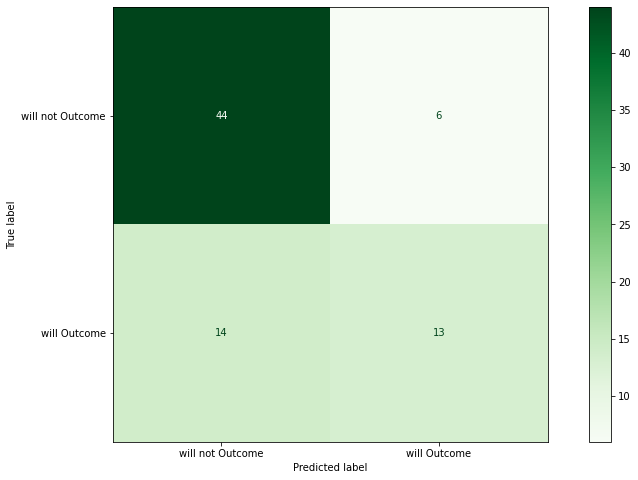

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
plot_confusion_matrix(grid_result,
                      X_lr_test, 
                      y_lr_test['Outcome'], 
                      display_labels=["will not Outcome", "will Outcome"],
                      cmap='Greens',
                     ax = ax)
plt.show()

In [ ]:
TN_svm_gscv = confusion_matrix_svm_gscv[0,0]
print("True Negatives = ", TN_svm_gscv)

FN_svm_gscv = confusion_matrix_svm_gscv[1,0]
print("False Negatives = ", FN_svm_gscv)

FP_svm_gscv = confusion_matrix_svm_gscv[0,1]
print("False Positives = ", FP_svm_gscv)

TP_svm_gscv = confusion_matrix_svm_gscv[1,1]
print("True Positives = ", TP_svm_gscv)

True Negatives =  44
False Negatives =  14
False Positives =  6
True Positives =  13


##### Performance metric

In [ ]:
accuracy_svm_gscv = np.round(accuracy_score(y_svm_test['Outcome'], 
                           y_svm_pred), 2)
precision_svm_gscv = np.round(precision_score(y_svm_test['Outcome'], 
                                      y_svm_pred), 2)
recall_svm_gscv = np.round(recall_score(y_svm_test['Outcome'], 
                                y_svm_pred), 2)
f1_score_svm_gscv = np.round(f1_score(y_svm_test['Outcome'], 
                               y_svm_pred), 2)
HarmonicMean_svm_gscv = (2*precision_svm_gscv*recall_svm_gscv)/(precision_svm_gscv+recall_svm_gscv)
Specificity_svm_gscv = TN_svm_gscv/(TN_svm_gscv+FP_svm_gscv)

print('Accuracy = ', np.round(accuracy_svm_gscv*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_svm_gscv*100, 2),"%") #Higher Better
print("Recall = ", recall_svm_gscv*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_svm_gscv*100, 2),"%") #Higher Better
print("Harmonic Mean = ", np.round(HarmonicMean_svm_gscv*100, 2),"%") #Higher Better
print("Specificity = ", np.round(Specificity_svm_gscv*100, 2),"%") #Higher Better

Accuracy =  74.0 %
Precision =  68.0 %
Recall =  48.0 %
f1 score =  57.0 %
Harmonic Mean =  56.28 %
Specificity =  88.0 %


######Classification report

In [ ]:
print(classification_report(y_svm_test['Outcome'], y_svm_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        50
           1       0.68      0.48      0.57        27

    accuracy                           0.74        77
   macro avg       0.72      0.68      0.69        77
weighted avg       0.73      0.74      0.73        77



######**ROC-AUC**

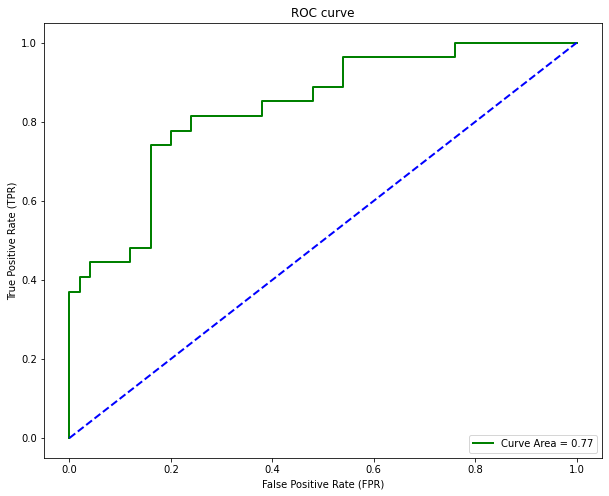

In [ ]:
FPR, TPR, thr = roc_curve(y_lr_test['Outcome'], grid_result.predict_proba(X_svm_test)[:,1])

auc_svm_gscv = np.round(roc_auc_score(y_lr_test['Outcome'], y_lr_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(FPR, 
         TPR, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc_svm_gscv))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": FPR, "TPR": TPR})
display(roc_data.head())

,threshold,FPR,TPR
0,1.916687,0.00,0.000000
1,0.916687,0.00,0.037037
2,0.665899,0.00,0.370370
3,0.657163,0.02,0.370370
4,0.639387,0.02,0.407407


###Training: Random Forest

##### Prerequisites

In [ ]:
# Copy Dataset
df_rfc = df.copy()

**Feature and target variable separation**

In [ ]:
X_rfc = df_rfc.drop('Outcome', axis=1)
y_rfc = df_rfc[['Outcome']]

print("Features:" ,X_rfc.shape)
print("Targets:" ,y_rfc.shape)

Features: (768, 8)
Targets: (768, 1)


**Train test separation**

In [ ]:
X_rfc_train, X_rfc_test, y_rfc_train, y_rfc_test = train_test_split(X_rfc, 
                                                    y_rfc, 
                                                    test_size=0.1, 
                                                    random_state=22, stratify=y_rfc)

print(X_rfc_train.shape, X_rfc_test.shape, y_rfc_train.shape, y_rfc_test.shape)

(691, 8) (77, 8) (691, 1) (77, 1)


**Algorithm Training**

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
model=RandomForestClassifier(n_estimators=100, max_depth=40,
                               min_samples_leaf=50,
                               n_jobs=-1, class_weight='balanced',
                               random_state=50)

model = model.fit(X_rfc_train, y_rfc_train)

##### Prediction

In [ ]:
y_rfc_pred = model.predict(X_rfc_test)

# Prediction Comparison with the test data
y_rfc_test['probability'] = np.round(model.predict_proba(X_rfc_test)[:,1], 2)
y_rfc_test['predicted_Outcome'] = y_rfc_pred

display(y_rfc_test.sample(10))

,Outcome,probability,predicted_Outcome
55,0,0.08,0
556,0,0.38,0
239,0,0.24,0
540,1,0.55,1
211,0,0.62,1
564,0,0.35,0
251,0,0.46,0
600,0,0.19,0
52,0,0.25,0
296,1,0.60,1


In [ ]:
test_rfc = pd.concat([X_rfc_test, y_rfc_test], axis=1)
display(test_rfc.sample(10))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,probability,predicted_Outcome
33,6,92,92,0,0,19.9,0.188,28,0,0.25,0
608,0,152,82,39,272,41.5,0.270,27,0,0.67,1
643,4,90,0,0,0,28.0,0.610,31,0,0.36,0
21,8,99,84,0,0,35.4,0.388,50,0,0.48,0
645,2,157,74,35,440,39.4,0.134,30,0,0.68,1
245,9,184,85,15,0,30.0,1.213,49,1,0.72,1
136,0,100,70,26,50,30.8,0.597,21,0,0.23,0
733,2,106,56,27,165,29.0,0.426,22,0,0.24,0
238,9,164,84,21,0,30.8,0.831,32,1,0.73,1
133,8,84,74,31,0,38.3,0.457,39,0,0.50,1


##### Confuision Matrix

In [ ]:
confusion_matrix_rfc = confusion_matrix(y_rfc_test['Outcome'], 
                                     y_rfc_test['predicted_Outcome'])

print('confusion_matrix: \n', confusion_matrix_rfc)

confusion_matrix: 
 [[39 11]
 [ 8 19]]


In [ ]:
#Outcome
y_rfc_test['Outcome'].value_counts()

0    50
1    27
Name: Outcome, dtype: int64

In [ ]:
#Predicted Outcome
y_rfc_test['predicted_Outcome'].value_counts()

0    47
1    30
Name: predicted_Outcome, dtype: int64

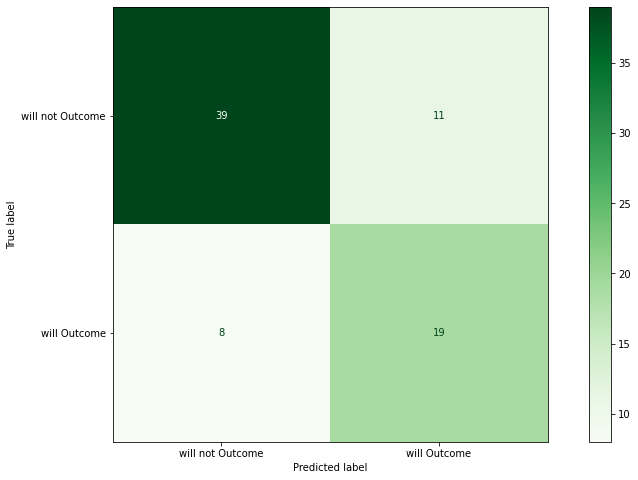

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
# plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(model, 
                      X_rfc_test, 
                      y_rfc_test['Outcome'], 
                      display_labels=["will not Outcome", "will Outcome"],
                      cmap='Greens',
                     ax = ax)
plt.show()

###### True Positive Rate, True Negative Rate, False Positive Rate & False Negative Rate

In [ ]:
TN_rfc = confusion_matrix_rfc[0,0]
print("True Negatives = ", TN_rfc)

FN_rfc = confusion_matrix_rfc[1,0]
print("False Negatives = ", FN_rfc)

FP_rfc = confusion_matrix_rfc[0,1]
print("False Positives = ", FP_rfc)

TP_rfc = confusion_matrix_rfc[1,1]
print("True Positives = ", TP_rfc)

True Negatives =  39
False Negatives =  8
False Positives =  11
True Positives =  19


In [ ]:
TPR = np.round(TP_rfc / (TP_rfc + FN_rfc), 2)
TNR = np.round(TN_rfc / (TN_rfc + FP_rfc), 2)
FPR = np.round(FP_rfc / (FP_rfc + TN_rfc), 2)
FNR = np.round(FN_rfc / (FP_rfc + TN_rfc), 2)
 
print("True Positive Rate = ", TPR*100,"%") #Higher Better
print("True Negative Rate = ", TNR*100,"%")
print("False Positive Rate = ", FPR*100,"%") # Lower Better
print("False Negative Rate = ", FNR*100,"%")

True Positive Rate =  70.0 %
True Negative Rate =  78.0 %
False Positive Rate =  22.0 %
False Negative Rate =  16.0 %


##### Performance metric

In [ ]:
accuracy_rfc = accuracy_score(y_rfc_test['Outcome'], 
                           y_rfc_test['predicted_Outcome'])
precision_rfc = np.round(precision_score(y_rfc_test['Outcome'], 
                                      y_rfc_test['predicted_Outcome']), 2)
recall_rfc = np.round(recall_score(y_rfc_test['Outcome'], 
                                y_rfc_test['predicted_Outcome']), 2)
f1_score_rfc = np.round(f1_score(y_rfc_test['Outcome'], 
                               y_rfc_test['predicted_Outcome']), 2)
HarmonicMean_rfc = (2*precision_rfc*recall_rfc)/(precision_rfc+recall_rfc)
Specificity_rfc = TN_rfc/(TN_rfc+FP_rfc)

print('Accuracy = ', np.round(accuracy_rfc*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_rfc*100, 2),"%") #Higher Better
print("Recall = ", recall_rfc*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_rfc*100, 2),"%") #Higher Better
print("Harmonic Mean = ", np.round(HarmonicMean_rfc*100, 2),"%") #Higher Better
print("Specificity = ", np.round(Specificity_rfc*100, 2),"%") #Higher Better

Accuracy =  75.32 %
Precision =  63.0 %
Recall =  70.0 %
f1 score =  67.0 %
Harmonic Mean =  66.32 %
Specificity =  78.0 %


######Classification report

In [ ]:
print(classification_report(y_rfc_test['Outcome'], y_rfc_test['predicted_Outcome']))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80        50
           1       0.63      0.70      0.67        27

    accuracy                           0.75        77
   macro avg       0.73      0.74      0.74        77
weighted avg       0.76      0.75      0.76        77



######**ROC-AUC**

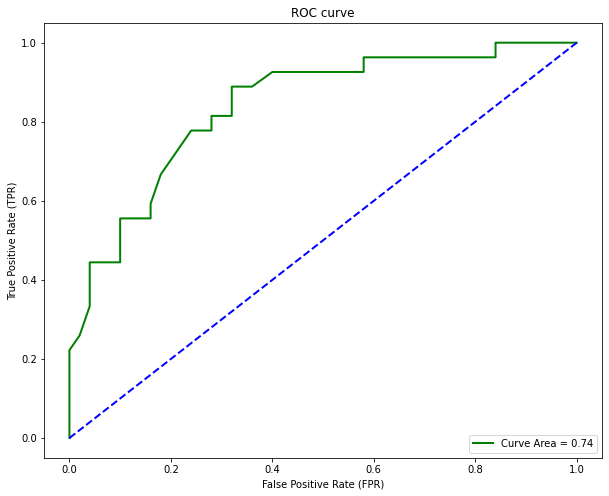

In [ ]:
FPR, TPR, thr = roc_curve(y_rfc_test['Outcome'], 
                          y_rfc_test['probability'])
auc_rfc = np.round(roc_auc_score(y_rfc_test['Outcome'], 
                             y_rfc_test['predicted_Outcome']), 2)

plt.figure(figsize=(10, 8))
plt.plot(FPR, 
         TPR, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc_rfc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": FPR, "TPR": TPR})
display(roc_data.head())

,threshold,FPR,TPR
0,1.79,0.0,0.000000
1,0.79,0.0,0.037037
2,0.76,0.0,0.111111
3,0.74,0.0,0.185185
4,0.73,0.0,0.222222


#### Grid Search and Cross Validation

In [ ]:
model = RandomForestClassifier(n_estimators=100)

print(model.get_params().keys())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


In [ ]:
parameters = {'criterion': ['entropy'],
              'n_estimators': [1],
              'max_depth': [28],
              'max_features': [None],
              'min_samples_split': [2]}

model = RandomForestClassifier(n_estimators=100)

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="f1",
                           cv=10,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_rfc_train, y_rfc_train)

In [ ]:
y_rfc_pred = np.round(grid_result.predict(X_rfc_test), 2)

In [ ]:
#Best hyperparameters in the grid search
grid_result.best_params_

{'criterion': 'entropy',
 'max_depth': 28,
 'max_features': None,
 'min_samples_split': 2,
 'n_estimators': 1}

In [ ]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.595745,0.608696,0.693878,0.581818,0.561404,0.598619,0.058424,1


Index(['split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


##### Model performance evaluation with the best found model in grid search and cross-validation

######Confuision Matrix

In [ ]:
confusion_matrix_rfc_gscv = confusion_matrix(y_rfc_test['Outcome'], y_rfc_pred)
print('confusion_matrix: \n', confusion_matrix_rfc_gscv)

confusion_matrix: 
 [[43  7]
 [13 14]]


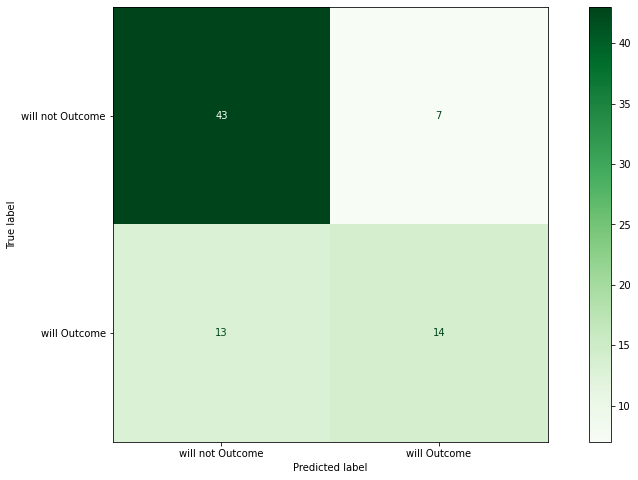

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
plot_confusion_matrix(grid_result,
                      X_rfc_test, 
                      y_rfc_test['Outcome'], 
                      display_labels=["will not Outcome", "will Outcome"],
                      cmap='Greens',
                     ax = ax)
plt.show()

In [ ]:
TN_rfc_gscv = confusion_matrix_rfc_gscv[0,0]
print("True Negatives = ", TN_rfc_gscv)

FN_rfc_gscv = confusion_matrix_rfc_gscv[1,0]
print("False Negatives = ", FN_rfc_gscv)

FP_rfc_gscv = confusion_matrix_rfc_gscv[0,1]
print("False Positives = ", FP_rfc_gscv)

TP_rfc_gscv = confusion_matrix_rfc_gscv[1,1]
print("True Positives = ", TP_rfc_gscv)

True Negatives =  43
False Negatives =  13
False Positives =  7
True Positives =  14


##### Performance metric

In [ ]:
accuracy_rfc_gscv = np.round(accuracy_score(y_rfc_test['Outcome'], 
                           y_rfc_pred), 2)
precision_rfc_gscv = np.round(precision_score(y_rfc_test['Outcome'], 
                                      y_rfc_pred), 2)
recall_rfc_gscv = np.round(recall_score(y_rfc_test['Outcome'], 
                                y_rfc_pred), 2)
f1_score_rfc_gscv = np.round(f1_score(y_rfc_test['Outcome'], 
                               y_rfc_pred), 2)
HarmonicMean_rfc_gscv = (2*precision_rfc_gscv*recall_rfc_gscv)/(precision_rfc_gscv+recall_rfc_gscv)
Specificity_rfc_gscv = TN_rfc_gscv/(TN_rfc_gscv + FP_rfc_gscv)

print('Accuracy = ', np.round(accuracy_rfc_gscv*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_rfc_gscv*100, 2),"%") #Higher Better
print("Recall = ", recall_rfc_gscv*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_rfc_gscv*100, 2),"%") #Higher Better
print("Harmonic Mean = ", np.round(HarmonicMean_rfc_gscv*100, 2),"%") #Higher Better
print("Specificity = ", np.round(Specificity_rfc_gscv*100, 2),"%") #Higher Better

Accuracy =  74.0 %
Precision =  67.0 %
Recall =  52.0 %
f1 score =  58.0 %
Harmonic Mean =  58.55 %
Specificity =  86.0 %


######Classification report

In [ ]:
print(classification_report(y_rfc_test['Outcome'], y_rfc_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        50
           1       0.67      0.52      0.58        27

    accuracy                           0.74        77
   macro avg       0.72      0.69      0.70        77
weighted avg       0.73      0.74      0.73        77



######**ROC-AUC**

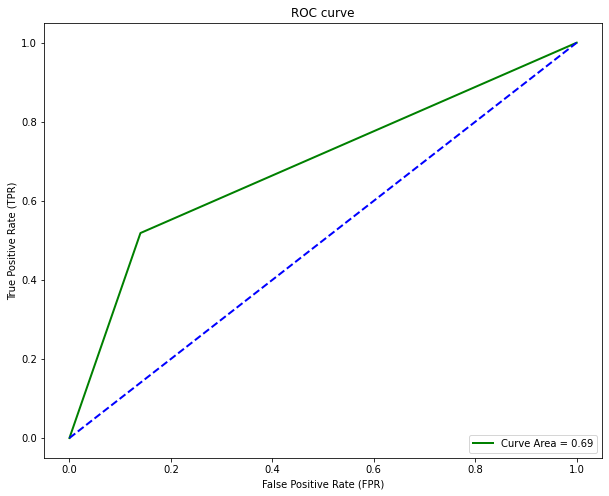

In [ ]:
FPR, TPR, thr = roc_curve(y_rfc_test['Outcome'], grid_result.predict_proba(X_rfc_test)[:,1])

auc_rfc_gscv = np.round(roc_auc_score(y_rfc_test['Outcome'], y_rfc_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(FPR, 
         TPR, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc_rfc_gscv))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": FPR, "TPR": TPR})
display(roc_data.head())

,threshold,FPR,TPR
0,2.0,0.00,0.000000
1,1.0,0.14,0.518519
2,0.0,1.00,1.000000


###Training: Gaussian Naive Bayes

##### Prerequisites

In [ ]:
# Copy Dataset
df_gnb = df.copy()

**Feature and target variable separation**

In [ ]:
X_gnb = df_gnb.drop('Outcome', axis=1)
y_gnb = df_gnb[['Outcome']]

print("Features:" ,X_gnb.shape)
print("Targets:" ,y_gnb.shape)

Features: (768, 8)
Targets: (768, 1)


**Train test separation**

In [ ]:
X_gnb_train, X_gnb_test, y_gnb_train, y_gnb_test = train_test_split(X_gnb, 
                                                    y_gnb, 
                                                    test_size=0.1, 
                                                    random_state=22, stratify=y_gnb)

print(X_gnb_train.shape, X_gnb_test.shape, y_gnb_train.shape, y_gnb_test.shape)

(691, 8) (77, 8) (691, 1) (77, 1)


**Algorithm Training**

In [ ]:
#Import Random Forest Model
from sklearn.naive_bayes import GaussianNB

#
model= GaussianNB()

model = model.fit(X_gnb_train, y_gnb_train)

##### Prediction

In [ ]:
y_gnb_pred = model.predict(X_gnb_test)

# Prediction Comparison with the test data
y_gnb_test['probability'] = np.round(model.predict_proba(X_gnb_test)[:,1], 2)
y_gnb_test['predicted_Outcome'] = y_gnb_pred

display(y_gnb_test.sample(10))

,Outcome,probability,predicted_Outcome
136,0,0.03,0
197,1,0.02,0
554,0,0.05,0
33,0,0.03,0
245,1,0.99,1
338,1,0.88,1
198,1,0.23,0
210,0,0.01,0
52,0,0.02,0
477,0,0.08,0


In [ ]:
test_gnb = pd.concat([X_gnb_test, y_gnb_test], axis=1)
display(test_gnb.sample(10))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,probability,predicted_Outcome
551,3,84,68,30,106,31.9,0.591,25,0,0.04,0
198,4,109,64,44,99,34.8,0.905,26,1,0.23,0
343,5,122,86,0,0,34.7,0.290,33,0,0.19,0
600,1,108,88,19,0,27.1,0.400,24,0,0.03,0
446,1,100,72,12,70,25.3,0.658,28,0,0.03,0
53,8,176,90,34,300,33.7,0.467,58,1,0.99,1
225,1,87,78,27,32,34.6,0.101,22,0,0.03,0
553,1,88,62,24,44,29.9,0.422,23,0,0.02,0
643,4,90,0,0,0,28.0,0.610,31,0,0.22,0
239,0,104,76,0,0,18.4,0.582,27,0,0.01,0


##### Confuision Matrix

In [ ]:
confusion_matrix_gnb = confusion_matrix(y_gnb_test['Outcome'], 
                                     y_gnb_test['predicted_Outcome'])

print('confusion_matrix: \n', confusion_matrix_gnb)

confusion_matrix: 
 [[43  7]
 [10 17]]


In [ ]:
#Outcome
y_gnb_test['Outcome'].value_counts()

0    50
1    27
Name: Outcome, dtype: int64

In [ ]:
#Predicted Outcome
y_gnb_test['predicted_Outcome'].value_counts()

0    53
1    24
Name: predicted_Outcome, dtype: int64

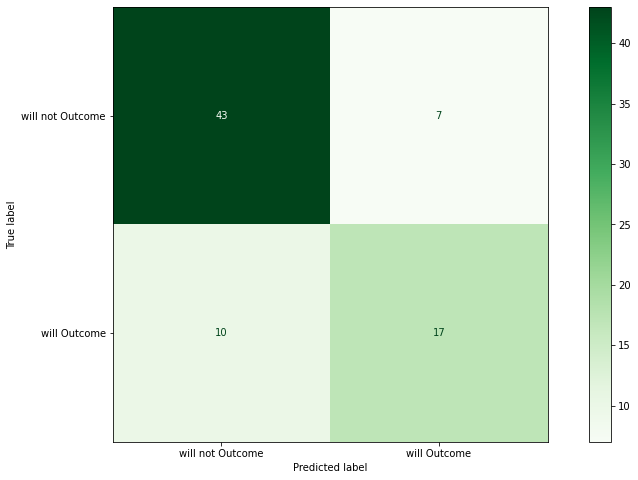

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
# plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(model, 
                      X_gnb_test, 
                      y_gnb_test['Outcome'], 
                      display_labels=["will not Outcome", "will Outcome"],
                      cmap='Greens',
                     ax = ax)
plt.show()

###### True Positive Rate, True Negative Rate, False Positive Rate & False Negative Rate

In [ ]:
TN_gnb = confusion_matrix_gnb[0,0]
print("True Negatives = ", TN_gnb)

FN_gnb = confusion_matrix_gnb[1,0]
print("False Negatives = ", FN_gnb)

FP_gnb = confusion_matrix_gnb[0,1]
print("False Positives = ", FP_gnb)

TP_gnb = confusion_matrix_gnb[1,1]
print("True Positives = ", TP_gnb)

True Negatives =  43
False Negatives =  10
False Positives =  7
True Positives =  17


In [ ]:
TPR = np.round(TP_gnb / (TP_gnb + FN_gnb), 2)
TNR = np.round(TN_gnb / (TN_gnb + FP_gnb), 2)
FPR = np.round(FP_gnb / (FP_gnb + TN_gnb), 2)
FNR = np.round(FN_gnb / (FP_gnb + TN_gnb), 2)
 
print("True Positive Rate = ", TPR*100,"%") #Higher Better
print("True Negative Rate = ", TNR*100,"%")
print("False Positive Rate = ", FPR*100,"%") # Lower Better
print("False Negative Rate = ", FNR*100,"%")

True Positive Rate =  63.0 %
True Negative Rate =  86.0 %
False Positive Rate =  14.000000000000002 %
False Negative Rate =  20.0 %


##### Performance metric

In [ ]:
accuracy_gnb = accuracy_score(y_gnb_test['Outcome'], 
                           y_gnb_test['predicted_Outcome'])
precision_gnb = np.round(precision_score(y_gnb_test['Outcome'], 
                                      y_gnb_test['predicted_Outcome']), 2)
recall_gnb = np.round(recall_score(y_gnb_test['Outcome'], 
                                y_gnb_test['predicted_Outcome']), 2)
f1_score_gnb = np.round(f1_score(y_gnb_test['Outcome'], 
                               y_gnb_test['predicted_Outcome']), 2)
HarmonicMean_gnb = (2*precision_gnb*recall_gnb)/(precision_gnb+recall_gnb)
Specificity_gnb = TN_gnb/(TN_gnb+FP_gnb)

print('Accuracy = ', np.round(accuracy_gnb*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_gnb*100, 2),"%") #Higher Better
print("Recall = ", recall_gnb*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_gnb*100, 2),"%") #Higher Better
print("Harmonic Mean = ", np.round(HarmonicMean_gnb*100, 2),"%") #Higher Better
print("Specificity = ", np.round(Specificity_gnb*100, 2),"%") #Higher Better

Accuracy =  77.92 %
Precision =  71.0 %
Recall =  63.0 %
f1 score =  67.0 %
Harmonic Mean =  66.76 %
Specificity =  86.0 %


######Classification report

In [ ]:
print(classification_report(y_gnb_test['Outcome'], y_gnb_test['predicted_Outcome']))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        50
           1       0.71      0.63      0.67        27

    accuracy                           0.78        77
   macro avg       0.76      0.74      0.75        77
weighted avg       0.78      0.78      0.78        77



######**ROC-AUC**

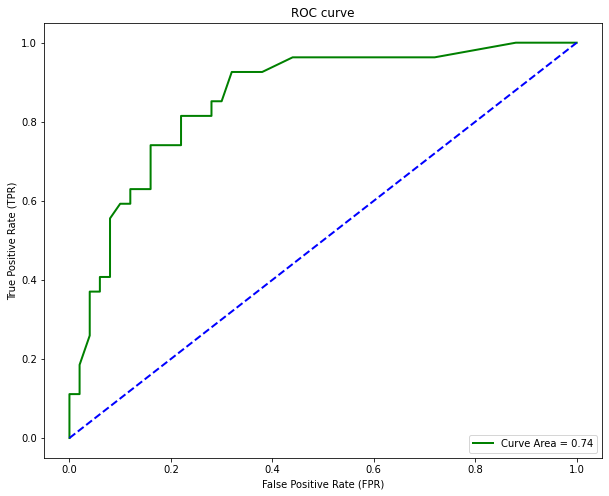

In [ ]:
FPR, TPR, thr = roc_curve(y_gnb_test['Outcome'], 
                          y_gnb_test['probability'])
auc_gnb = np.round(roc_auc_score(y_gnb_test['Outcome'], 
                             y_gnb_test['predicted_Outcome']), 2)

plt.figure(figsize=(10, 8))
plt.plot(FPR, 
         TPR, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc_gnb))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": FPR, "TPR": TPR})
display(roc_data.head())

,threshold,FPR,TPR
0,2.00,0.00,0.000000
1,1.00,0.00,0.037037
2,0.99,0.00,0.111111
3,0.98,0.02,0.111111
4,0.91,0.02,0.185185


#### Grid Search and Cross Validation

In [ ]:
model = GaussianNB()

print(model.get_params().keys())

dict_keys(['priors', 'var_smoothing'])


In [ ]:
# https://www.analyticsvidhya.com/blog/2021/01/gaussian-naive-bayes-with-hyperpameter-tuning/
# https://www.kaggle.com/code/sfktrkl/titanic-hyperparameter-tuning-gridsearchcv

parameters = {'var_smoothing': np.logspace(0, -9, num=100)}

model = GaussianNB()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="f1",
                           cv=10,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_gnb_train, y_gnb_train)

In [ ]:
y_gnb_pred = np.round(grid_result.predict(X_gnb_test), 2)

In [ ]:
#Best hyperparameters in the grid search
grid_result.best_params_

{'var_smoothing': 8.111308307896872e-07}

In [ ]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
67,0.571429,0.625000,0.604651,0.666667,0.695652,0.628596,0.057358,1
68,0.571429,0.625000,0.604651,0.666667,0.695652,0.628596,0.057358,1
69,0.571429,0.625000,0.604651,0.666667,0.695652,0.628596,0.057358,1
71,0.571429,0.625000,0.604651,0.666667,0.695652,0.628596,0.057358,1
70,0.571429,0.625000,0.604651,0.666667,0.695652,0.627355,0.058184,5
...,...,...,...,...,...,...,...,...
5,0.214286,0.071429,0.200000,0.258065,0.076923,0.171811,0.079676,96
3,0.214286,0.071429,0.206897,0.200000,0.000000,0.160606,0.089227,97
2,0.076923,0.071429,0.214286,0.200000,0.000000,0.142600,0.080883,98
1,0.076923,0.000000,0.148148,0.206897,0.000000,0.116253,0.085426,99


Index(['split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


##### Model performance evaluation with the best found model in grid search and cross-validation

######Confuision Matrix

In [ ]:
confusion_matrix_gnb_gscv = confusion_matrix(y_gnb_test['Outcome'], y_gnb_pred)
print('confusion_matrix: \n', confusion_matrix_gnb_gscv)

confusion_matrix: 
 [[43  7]
 [10 17]]


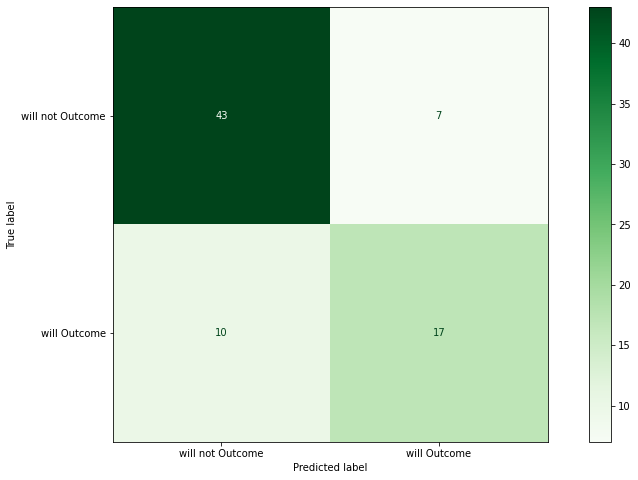

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
plot_confusion_matrix(grid_result,
                      X_gnb_test, 
                      y_gnb_test['Outcome'], 
                      display_labels=["will not Outcome", "will Outcome"],
                      cmap='Greens',
                     ax = ax)
plt.show()

In [ ]:
TN_gnb_gscv = confusion_matrix_gnb_gscv[0,0]
print("True Negatives = ", TN_gnb_gscv)

FN_gnb_gscv = confusion_matrix_gnb_gscv[1,0]
print("False Negatives = ", FN_gnb_gscv)

FP_gnb_gscv = confusion_matrix_gnb_gscv[0,1]
print("False Positives = ", FP_gnb_gscv)

TP_gnb_gscv = confusion_matrix_gnb_gscv[1,1]
print("True Positives = ", TP_gnb_gscv)

True Negatives =  43
False Negatives =  10
False Positives =  7
True Positives =  17


##### Performance metric

In [ ]:
accuracy_gnb_gscv = np.round(accuracy_score(y_gnb_test['Outcome'], 
                           y_gnb_pred), 2)
precision_gnb_gscv = np.round(precision_score(y_gnb_test['Outcome'], 
                                      y_gnb_pred), 2)
recall_gnb_gscv = np.round(recall_score(y_gnb_test['Outcome'], 
                                y_gnb_pred), 2)
f1_score_gnb_gscv = np.round(f1_score(y_gnb_test['Outcome'], 
                               y_gnb_pred), 2)
HarmonicMean_gnb_gscv = (2*precision_gnb_gscv*recall_gnb_gscv)/(precision_gnb_gscv+recall_gnb_gscv)
Specificity_gnb_gscv = TN_gnb_gscv/(TN_gnb_gscv+FP_gnb_gscv)

print('Accuracy = ', np.round(accuracy_gnb_gscv*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_gnb_gscv*100, 2),"%") #Higher Better
print("Recall = ", recall_gnb_gscv*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_gnb_gscv*100, 2),"%") #Higher Better
print("Harmonic Mean = ", np.round(HarmonicMean_gnb_gscv*100, 2),"%") #Higher Better
print("Specificity = ", np.round(Specificity_gnb_gscv*100, 2),"%") #Higher Better

Accuracy =  78.0 %
Precision =  71.0 %
Recall =  63.0 %
f1 score =  67.0 %
Harmonic Mean =  66.76 %
Specificity =  86.0 %


######Classification report

In [ ]:
print(classification_report(y_gnb_test['Outcome'], y_gnb_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        50
           1       0.71      0.63      0.67        27

    accuracy                           0.78        77
   macro avg       0.76      0.74      0.75        77
weighted avg       0.78      0.78      0.78        77



######**ROC-AUC**

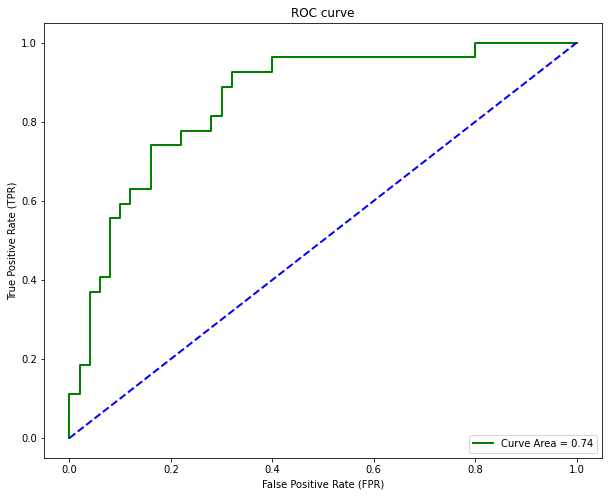

In [ ]:
# ROC-AUC
FPR, TPR, thr = roc_curve(y_gnb_test['Outcome'], grid_result.predict_proba(X_gnb_test)[:,1])

auc_gnb_gscv = np.round(roc_auc_score(y_gnb_test['Outcome'], y_gnb_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(FPR, 
         TPR, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc_gnb_gscv))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": FPR, "TPR": TPR})
display(roc_data.head())

,threshold,FPR,TPR
0,1.999874,0.00,0.000000
1,0.999874,0.00,0.037037
2,0.985069,0.00,0.111111
3,0.980189,0.02,0.111111
4,0.900975,0.02,0.185185


###Training: K-Neighbors Classifier

##### Prerequisites

In [ ]:
# Copy Dataset
df_knn = df.copy()

**Feature and target variable separation**

In [ ]:
X_knn = df_knn.drop('Outcome', axis=1)
y_knn = df_knn[['Outcome']]

print("Features:" ,X_knn.shape)
print("Targets:" ,y_knn.shape)

Features: (768, 8)
Targets: (768, 1)


**Train test separation**

In [ ]:
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, 
                                                    y_knn, 
                                                    test_size=0.1, 
                                                    random_state=22, stratify=y_knn)

print(X_knn_train.shape, X_knn_test.shape, y_knn_train.shape, y_knn_test.shape)

(691, 8) (77, 8) (691, 1) (77, 1)


**Algorithm Training**

In [ ]:
#Import Random Forest Model
from sklearn.neighbors import KNeighborsClassifier

#
model= KNeighborsClassifier(n_neighbors=5)

model = model.fit(X_knn_train, y_knn_train)

##### Prediction

In [ ]:
y_knn_pred = model.predict(X_knn_test)

# Prediction Comparison with the test data
y_knn_test['probability'] = np.round(model.predict_proba(X_knn_test)[:,1], 2)
y_knn_test['predicted_Outcome'] = y_knn_pred

display(y_knn_test.sample(10))

,Outcome,probability,predicted_Outcome
643,0,0.2,0
645,0,0.6,1
470,0,0.8,1
303,1,0.4,0
750,1,0.2,0
239,0,0.0,0
755,1,0.2,0
180,0,0.0,0
238,1,0.8,1
165,1,0.6,1


In [ ]:
test_knn = pd.concat([X_knn_test, y_knn_test], axis=1)
display(test_knn.sample(10))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,probability,predicted_Outcome
723,5,117,86,30,105,39.1,0.251,42,0,0.2,0
404,5,168,64,0,0,32.9,0.135,41,1,0.8,1
66,0,109,88,30,0,32.5,0.855,38,1,0.4,0
238,9,164,84,21,0,30.8,0.831,32,1,0.8,1
684,5,136,82,0,0,0.0,0.640,69,0,0.4,0
20,3,126,88,41,235,39.3,0.704,27,0,0.6,1
270,10,101,86,37,0,45.6,1.136,38,1,0.4,0
303,5,115,98,0,0,52.9,0.209,28,1,0.4,0
703,2,129,0,0,0,38.5,0.304,41,0,0.8,1
738,2,99,60,17,160,36.6,0.453,21,0,0.2,0


##### Confuision Matrix

In [ ]:
confusion_matrix_knn = confusion_matrix(y_knn_test['Outcome'], 
                                     y_knn_test['predicted_Outcome'])

print('confusion_matrix: \n', confusion_matrix_knn)

confusion_matrix: 
 [[42  8]
 [13 14]]


In [ ]:
#Outcome
y_knn_test['Outcome'].value_counts()

0    50
1    27
Name: Outcome, dtype: int64

In [ ]:
#Predicted Outcome
y_knn_test['predicted_Outcome'].value_counts()

0    55
1    22
Name: predicted_Outcome, dtype: int64

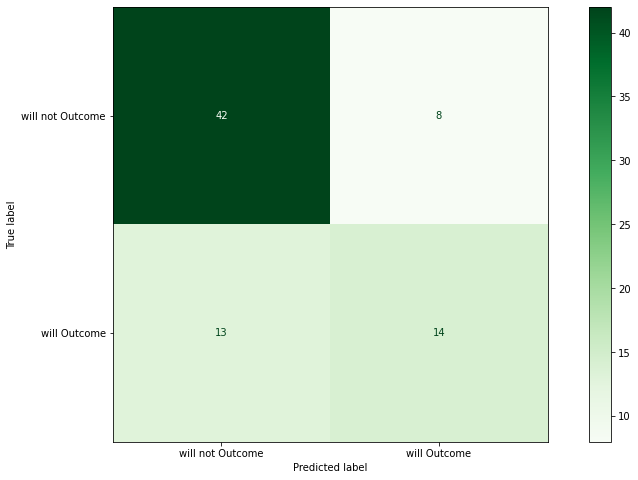

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
# plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(model, 
                      X_knn_test, 
                      y_knn_test['Outcome'], 
                      display_labels=["will not Outcome", "will Outcome"],
                      cmap='Greens',
                     ax = ax)
plt.show()

###### True Positive Rate, True Negative Rate, False Positive Rate & False Negative Rate

In [ ]:
TN_knn = confusion_matrix_knn[0,0]
print("True Negatives = ", TN_knn)

FN_knn = confusion_matrix_knn[1,0]
print("False Negatives = ", FN_knn)

FP_knn = confusion_matrix_knn[0,1]
print("False Positives = ", FP_knn)

TP_knn = confusion_matrix_knn[1,1]
print("True Positives = ", TP_knn)

True Negatives =  42
False Negatives =  13
False Positives =  8
True Positives =  14


In [ ]:
# True Positive Rate, True Negative Rate, False Positive Rate & False Negative Rate
TPR = np.round(TP_knn / (TP_knn + FN_knn), 2)
TNR = np.round(TN_knn / (TN_knn + FP_knn), 2)
FPR = np.round(FP_knn / (FP_knn + TN_knn), 2)
FNR = np.round(FN_knn / (FP_knn + TN_knn), 2)
 
print("True Positive Rate = ", TPR*100,"%") #Higher Better
print("True Negative Rate = ", TNR*100,"%")
print("False Positive Rate = ", FPR*100,"%") # Lower Better
print("False Negative Rate = ", FNR*100,"%")

True Positive Rate =  52.0 %
True Negative Rate =  84.0 %
False Positive Rate =  16.0 %
False Negative Rate =  26.0 %


##### Performance metric

In [ ]:
accuracy_knn = accuracy_score(y_knn_test['Outcome'], 
                           y_knn_test['predicted_Outcome'])
precision_knn = np.round(precision_score(y_knn_test['Outcome'], 
                                      y_knn_test['predicted_Outcome']), 2)
recall_knn = np.round(recall_score(y_knn_test['Outcome'], 
                                y_knn_test['predicted_Outcome']), 2)
f1_score_knn = np.round(f1_score(y_knn_test['Outcome'], 
                               y_knn_test['predicted_Outcome']), 2)
HarmonicMean_knn = (2*precision_knn*recall_knn)/(precision_knn + recall_knn)
Specificity_knn = TN_knn/(TN_knn + FP_knn)

print('Accuracy = ', np.round(accuracy_knn*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_knn*100, 2),"%") #Higher Better
print("Recall = ", recall_knn*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_knn*100, 2),"%") #Higher Better
print("Harmonic Mean = ", np.round(HarmonicMean_knn*100, 2),"%") #Higher Better
print("Specificity = ", np.round(Specificity_knn*100, 2),"%") #Higher Better

Accuracy =  72.73 %
Precision =  64.0 %
Recall =  52.0 %
f1 score =  57.0 %
Harmonic Mean =  57.38 %
Specificity =  84.0 %


######Classification report

In [ ]:
print(classification_report(y_knn_test['Outcome'], y_knn_test['predicted_Outcome']))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        50
           1       0.64      0.52      0.57        27

    accuracy                           0.73        77
   macro avg       0.70      0.68      0.69        77
weighted avg       0.72      0.73      0.72        77



######**ROC-AUC**

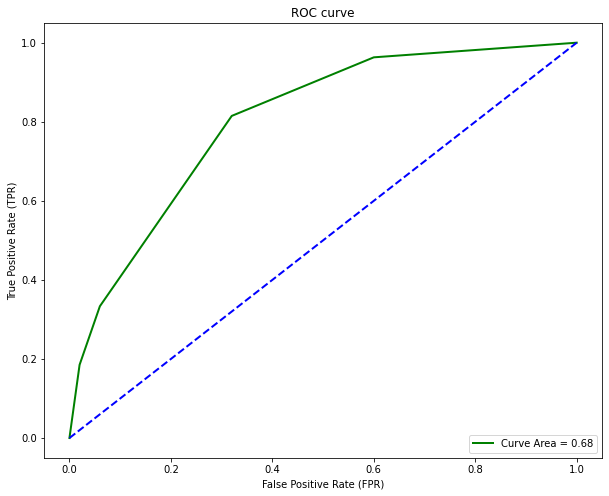

In [ ]:
FPR, TPR, thr = roc_curve(y_knn_test['Outcome'], 
                          y_knn_test['probability'])
auc_knn = np.round(roc_auc_score(y_knn_test['Outcome'], 
                             y_knn_test['predicted_Outcome']), 2)

plt.figure(figsize=(10, 8))
plt.plot(FPR, 
         TPR, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc_knn))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": FPR, "TPR": TPR})
display(roc_data.head())

,threshold,FPR,TPR
0,2.0,0.00,0.000000
1,1.0,0.02,0.185185
2,0.8,0.06,0.333333
3,0.6,0.16,0.518519
4,0.4,0.32,0.814815


#### Grid Search and Cross Validation

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)

print(model.get_params().keys())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])


In [ ]:
# https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic

parameters = {'n_neighbors': [19],
              'leaf_size': [1]}

model = KNeighborsClassifier(n_neighbors=5)

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="f1",
                           cv=10,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_knn_train, y_knn_train)

In [ ]:
y_knn_pred = np.round(grid_result.predict(X_knn_test), 2)

In [ ]:
#Best hyperparameters in the grid search
grid_result.best_params_

{'leaf_size': 1, 'n_neighbors': 19}

In [ ]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.536585,0.526316,0.604651,0.64,0.666667,0.602546,0.08454,1


Index(['split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


##### Model performance evaluation with the best found model in grid search and cross-validation

######Confuision Matrix

In [ ]:
confusion_matrix_knn_gscv = confusion_matrix(y_knn_test['Outcome'], y_knn_pred)
print('confusion_matrix: \n', confusion_matrix_knn_gscv)

confusion_matrix: 
 [[43  7]
 [13 14]]


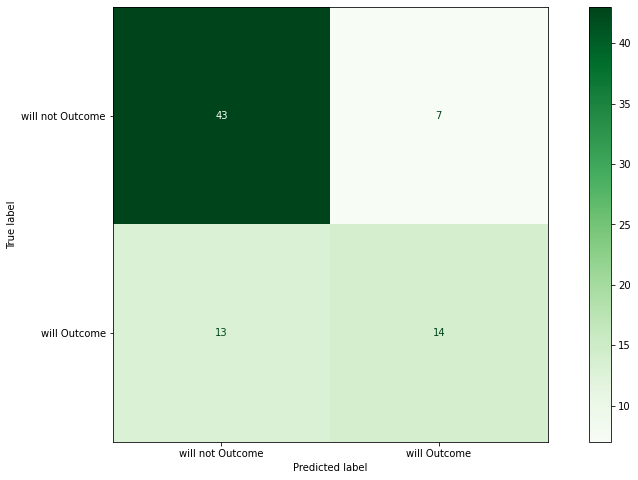

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
plot_confusion_matrix(grid_result,
                      X_knn_test, 
                      y_knn_test['Outcome'], 
                      display_labels=["will not Outcome", "will Outcome"],
                      cmap='Greens',
                     ax = ax)
plt.show()

In [ ]:
TN_knn_gscv = confusion_matrix_knn_gscv[0,0]
print("True Negatives = ", TN_knn_gscv)

FN_knn_gscv = confusion_matrix_knn_gscv[1,0]
print("False Negatives = ", FN_knn_gscv)

FP_knn_gscv = confusion_matrix_knn_gscv[0,1]
print("False Positives = ", FP_knn_gscv)

TP_knn_gscv = confusion_matrix_knn_gscv[1,1]
print("True Positives = ", TP_knn_gscv)

True Negatives =  43
False Negatives =  13
False Positives =  7
True Positives =  14


##### Performance metric

In [ ]:
accuracy_knn_gscv = np.round(accuracy_score(y_knn_test['Outcome'], 
                           y_knn_pred), 2)
precision_knn_gscv = np.round(precision_score(y_knn_test['Outcome'], 
                                      y_knn_pred), 2)
recall_knn_gscv = np.round(recall_score(y_knn_test['Outcome'], 
                                y_knn_pred), 2)
f1_score_knn_gscv = np.round(f1_score(y_knn_test['Outcome'], 
                               y_knn_pred), 2)
HarmonicMean_knn_gscv = (2*precision_knn_gscv*recall_knn_gscv)/(precision_knn_gscv+recall_knn_gscv)
Specificity_knn_gscv = TN_knn_gscv/(TN_knn_gscv+FP_knn_gscv)

print('Accuracy = ', np.round(accuracy_knn_gscv*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_knn_gscv*100, 2),"%") #Higher Better
print("Recall = ", recall_knn_gscv*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_knn_gscv*100, 2),"%") #Higher Better
print("Harmonic Mean = ", np.round(HarmonicMean_knn_gscv*100, 2),"%") #Higher Better
print("Specificity = ", np.round(Specificity_knn_gscv*100, 2),"%") #Higher Better

Accuracy =  74.0 %
Precision =  67.0 %
Recall =  52.0 %
f1 score =  58.0 %
Harmonic Mean =  58.55 %
Specificity =  86.0 %


######Classification report

In [ ]:
print(classification_report(y_knn_test['Outcome'], y_knn_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        50
           1       0.67      0.52      0.58        27

    accuracy                           0.74        77
   macro avg       0.72      0.69      0.70        77
weighted avg       0.73      0.74      0.73        77



######**ROC-AUC**

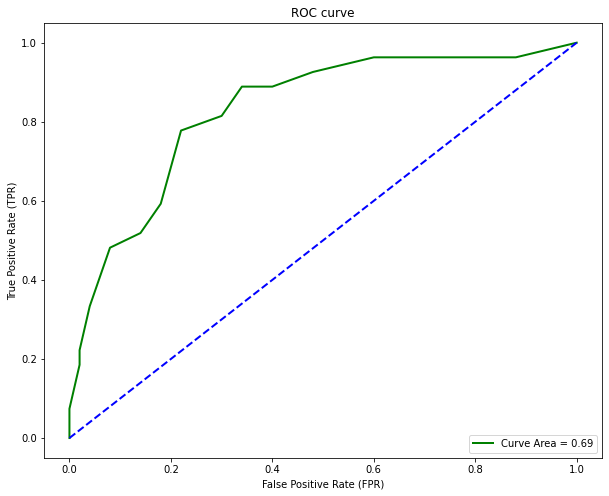

In [ ]:
FPR, TPR, thr = roc_curve(y_knn_test['Outcome'], grid_result.predict_proba(X_knn_test)[:,1])

auc_knn_gscv = np.round(roc_auc_score(y_knn_test['Outcome'], y_knn_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(FPR, 
         TPR, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc_knn_gscv))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": FPR, "TPR": TPR})
display(roc_data.head())

,threshold,FPR,TPR
0,1.842105,0.00,0.000000
1,0.842105,0.00,0.074074
2,0.736842,0.02,0.185185
3,0.684211,0.02,0.222222
4,0.631579,0.04,0.333333


###Training: XGBoost

#### Prerequisites

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
# Copy Dataset
df_xgb = df.copy()

**Feature and target variable separation**

In [ ]:
X_xgb = df_xgb.drop('Outcome', axis=1)
y_xgb = df_xgb[['Outcome']]

print("Features:" ,X_xgb.shape)
print("Targets:" ,y_xgb.shape)

Features: (768, 8)
Targets: (768, 1)


**Train test separation**

In [ ]:
X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, 
                                                    y_xgb, 
                                                    test_size=0.1, 
                                                    random_state=22, stratify=y_xgb)

print(X_xgb_train.shape, X_xgb_test.shape, y_xgb_train.shape, y_xgb_test.shape)

(691, 8) (77, 8) (691, 1) (77, 1)


**Algorithm Training**

In [ ]:
import xgboost
from sklearn.model_selection import GridSearchCV

xgboost.XGBClassifier().get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
model= xgboost.XGBClassifier(learning_rate=0.1,
                                      max_depth=5,
                                      n_estimators=5000,
                                      subsample=0.5,
                                      colsample_bytree=0.5,
                                      eval_metric='auc',
                                      verbosity=1)

model = model.fit(X_xgb_train, y_xgb_train, verbose=True)

##### Prediction

In [ ]:
y_xgb_pred = model.predict(X_xgb_test)

# Prediction Comparison with the test data
y_xgb_test['probability'] = np.round(model.predict_proba(X_xgb_test)[:,1], 2)
y_xgb_test['predicted_Outcome'] = y_xgb_pred

display(y_xgb_test.sample(10))

,Outcome,probability,predicted_Outcome
477,0,0.01,0
190,0,0.00,0
551,0,0.00,0
750,1,0.80,1
210,0,0.00,0
404,1,1.00,1
33,0,0.00,0
146,0,0.04,0
53,1,0.96,1
738,0,0.00,0


In [ ]:
test_xgb = pd.concat([X_xgb_test, y_xgb_test], axis=1)
display(test_xgb.sample(10))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,probability,predicted_Outcome
120,0,162,76,56,100,53.2,0.759,25,1,0.83,1
77,5,95,72,33,0,37.7,0.370,27,0,0.39,0
219,5,112,66,0,0,37.8,0.261,41,1,0.65,1
394,4,158,78,0,0,32.9,0.803,31,1,1.00,1
55,1,73,50,10,0,23.0,0.248,21,0,0.00,0
316,3,99,80,11,64,19.3,0.284,30,0,0.00,0
738,2,99,60,17,160,36.6,0.453,21,0,0.00,0
556,1,97,70,40,0,38.1,0.218,30,0,0.00,0
383,1,90,62,18,59,25.1,1.268,25,0,0.00,0
198,4,109,64,44,99,34.8,0.905,26,1,0.10,0


##### Confuision Matrix

In [ ]:
confusion_matrix_xgb = confusion_matrix(y_xgb_test['Outcome'], 
                                     y_xgb_test['predicted_Outcome'])

print('confusion_matrix: \n', confusion_matrix_xgb)

confusion_matrix: 
 [[43  7]
 [ 9 18]]


In [ ]:
#Outcome
y_xgb_test['Outcome'].value_counts()

0    50
1    27
Name: Outcome, dtype: int64

In [ ]:
#Predicted Outcome
y_xgb_test['predicted_Outcome'].value_counts()

0    52
1    25
Name: predicted_Outcome, dtype: int64

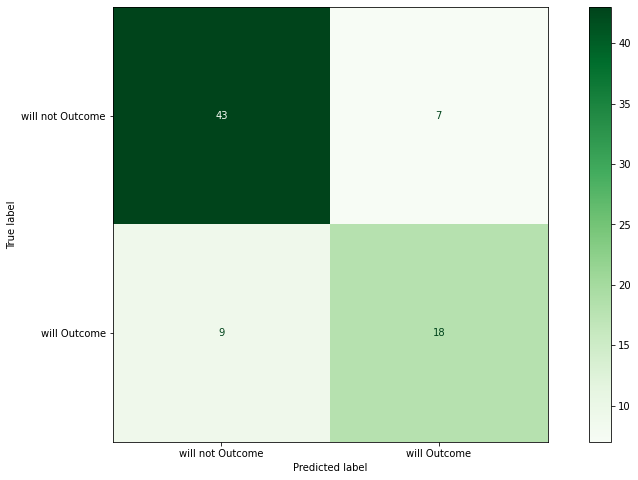

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
# plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(model, 
                      X_xgb_test, 
                      y_xgb_test['Outcome'], 
                      display_labels=["will not Outcome", "will Outcome"],
                      cmap='Greens',
                     ax = ax)
plt.show()

###### True Positive Rate, True Negative Rate, False Positive Rate & False Negative Rate

In [ ]:
TN_xgb = confusion_matrix_xgb[0,0]
print("True Negatives = ", TN_xgb)

FN_xgb = confusion_matrix_xgb[1,0]
print("False Negatives = ", FN_xgb)

FP_xgb = confusion_matrix_xgb[0,1]
print("False Positives = ", FP_xgb)

TP_xgb = confusion_matrix_xgb[1,1]
print("True Positives = ", TP_xgb)

True Negatives =  43
False Negatives =  9
False Positives =  7
True Positives =  18


In [ ]:
TPR = np.round(TP_xgb / (TP_xgb + FN_xgb), 2)
TNR = np.round(TN_xgb / (TN_xgb + FP_xgb), 2)
FPR = np.round(FP_xgb / (FP_xgb + TN_xgb), 2)
FNR = np.round(FN_xgb / (FP_xgb + TN_xgb), 2)
 
print("True Positive Rate = ", TPR*100,"%") #Higher Better
print("True Negative Rate = ", TNR*100,"%")
print("False Positive Rate = ", FPR*100,"%") # Lower Better
print("False Negative Rate = ", FNR*100,"%")

True Positive Rate =  67.0 %
True Negative Rate =  86.0 %
False Positive Rate =  14.000000000000002 %
False Negative Rate =  18.0 %


##### Performance metric

In [ ]:
accuracy_xgb = accuracy_score(y_xgb_test['Outcome'], 
                           y_xgb_test['predicted_Outcome'])
precision_xgb = np.round(precision_score(y_xgb_test['Outcome'], 
                                      y_xgb_test['predicted_Outcome']), 2)
recall_xgb = np.round(recall_score(y_xgb_test['Outcome'], 
                                y_xgb_test['predicted_Outcome']), 2)
f1_score_xgb = np.round(f1_score(y_xgb_test['Outcome'], 
                               y_xgb_test['predicted_Outcome']), 2)
HarmonicMean_xgb = (2*precision_xgb*recall_xgb)/(precision_xgb+recall_xgb)
Specificity_xgb = TN_xgb/(TN_xgb+FP_xgb)

print('Accuracy = ', np.round(accuracy_xgb*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_xgb*100, 2),"%") #Higher Better
print("Recall = ", recall_xgb*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_xgb*100, 2),"%") #Higher Better
print("Harmonic Mean = ", np.round(HarmonicMean_xgb*100, 2),"%") #Higher Better
print("Specificity = ", np.round(Specificity_xgb*100, 2),"%") #Higher Better

Accuracy =  79.22 %
Precision =  72.0 %
Recall =  67.0 %
f1 score =  69.0 %
Harmonic Mean =  69.41 %
Specificity =  86.0 %


######Classification report

In [ ]:
print(classification_report(y_xgb_test['Outcome'], y_xgb_test['predicted_Outcome']))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        50
           1       0.72      0.67      0.69        27

    accuracy                           0.79        77
   macro avg       0.77      0.76      0.77        77
weighted avg       0.79      0.79      0.79        77



######**ROC-AUC**

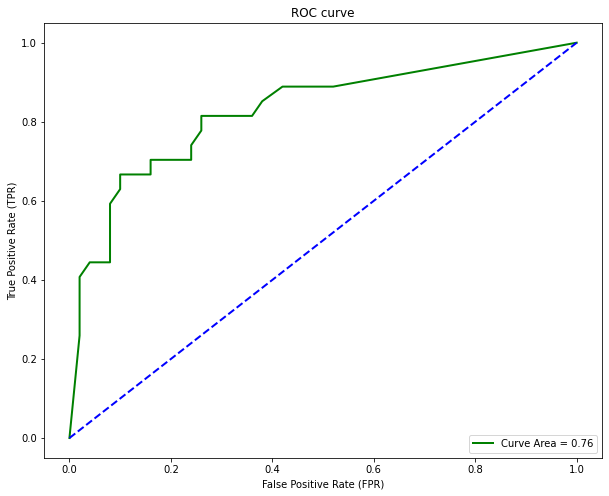

In [ ]:
FPR, TPR, thr = roc_curve(y_xgb_test['Outcome'], 
                          y_xgb_test['probability'])
auc_xgb = np.round(roc_auc_score(y_xgb_test['Outcome'], 
                             y_xgb_test['predicted_Outcome']), 2)

plt.figure(figsize=(10, 8))
plt.plot(FPR, 
         TPR, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc_xgb))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": FPR, "TPR": TPR})
display(roc_data.head())

,threshold,FPR,TPR
0,2.00,0.00,0.000000
1,1.00,0.02,0.259259
2,0.99,0.02,0.296296
3,0.97,0.02,0.407407
4,0.96,0.04,0.444444


#### Grid Search and Cross Validation

In [ ]:
learning_rate_list = [0.02, 0.05, 0.1]
max_depth_list = [2, 3, 5]
n_estimators_list = [1000, 2000, 3000]

params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list}

grid_search = GridSearchCV(estimator=xgboost.XGBClassifier(subsample=0.5,
                                                                colsample_bytree=0.25,
                                                                use_label_encoder=False),
                                param_grid=params_dict,
                                cv=2,
                                scoring="f1",
                                return_train_score=True,
                                verbose=4)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_xgb_train, y_xgb_train)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.823, test=0.615) total time=   0.2s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.845, test=0.621) total time=   0.2s
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.901, test=0.617) total time=   0.3s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.905, test=0.603) total time=   0.3s
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.953, test=0.612) total time=   0.5s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.958, test=0.596) total time=   0.5s
[CV 1/2] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.922, test=0.616) total time=   0.2s
[CV 2/2] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.927, test=0.598) total time=   0.2s
[CV

In [ ]:
y_xgb_pred = np.round(grid_result.predict(X_xgb_test), 2)

In [ ]:
#Best hyperparameters in the grid search
grid_result.best_params_

{'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 1000}

In [ ]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['split0_test_score',
                       'split1_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.615385,0.620690,0.618037,0.002653,1
1,0.616667,0.602620,0.609643,0.007023,2
21,0.610879,0.606838,0.608858,0.002021,3
9,0.612766,0.602620,0.607693,0.005073,4
3,0.616034,0.598291,0.607162,0.008872,5
4,0.618644,0.594828,0.606736,0.011908,6
7,0.626609,0.586207,0.606408,0.020201,7
18,0.610169,0.600858,0.605514,0.004656,8
5,0.624473,0.586207,0.605340,0.019133,9
2,0.611570,0.595745,0.603657,0.007913,10


Index(['split0_test_score', 'split1_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


##### Model performance evaluation with the best found model in grid search and cross-validation

######Confuision Matrix

In [ ]:
confusion_matrix_xgb_gscv = confusion_matrix(y_xgb_test['Outcome'], y_xgb_pred)
print('confusion_matrix: \n', confusion_matrix_xgb_gscv)

confusion_matrix: 
 [[44  6]
 [10 17]]


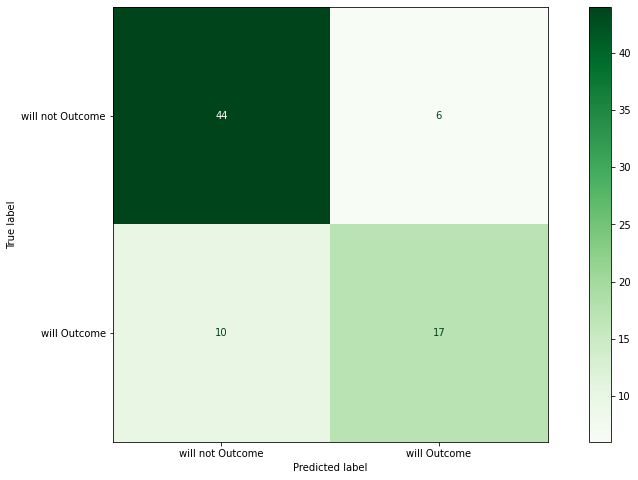

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
plot_confusion_matrix(grid_result,
                      X_xgb_test, 
                      y_xgb_test['Outcome'], 
                      display_labels=["will not Outcome", "will Outcome"],
                      cmap='Greens',
                     ax = ax)
plt.show()

In [ ]:
TN_xgb_gscv = confusion_matrix_xgb_gscv[0,0]
print("True Negatives = ", TN_xgb_gscv)

FN_xgb_gscv = confusion_matrix_xgb_gscv[1,0]
print("False Negatives = ", FN_xgb_gscv)

FP_xgb_gscv = confusion_matrix_xgb_gscv[0,1]
print("False Positives = ", FP_xgb_gscv)

TP_xgb_gscv = confusion_matrix_xgb_gscv[1,1]
print("True Positives = ", TP_xgb_gscv)

True Negatives =  44
False Negatives =  10
False Positives =  6
True Positives =  17


##### Performance metric

In [ ]:
accuracy_xgb_gscv = np.round(accuracy_score(y_xgb_test['Outcome'], 
                           y_xgb_pred), 2)
precision_xgb_gscv = np.round(precision_score(y_xgb_test['Outcome'], 
                                      y_xgb_pred), 2)
recall_xgb_gscv = np.round(recall_score(y_xgb_test['Outcome'], 
                                y_xgb_pred), 2)
f1_score_xgb_gscv = np.round(f1_score(y_xgb_test['Outcome'], 
                               y_xgb_pred), 2)
HarmonicMean_xgb_gscv = (2*precision_xgb_gscv*recall_xgb_gscv)/(precision_xgb_gscv+recall_xgb_gscv)
Specificity_xgb_gscv = TN_xgb_gscv/(TN_xgb_gscv+FP_xgb_gscv)

print('Accuracy = ', np.round(accuracy_xgb_gscv*100, 2),"%") #Higher Better
print("Precision = ", np.round(precision_xgb_gscv*100, 2),"%") #Higher Better
print("Recall = ", recall_xgb_gscv*100,"%") #Higher Better
print("f1 score = ", np.round(f1_score_xgb_gscv*100, 2),"%") #Higher Better
print("Harmonic Mean = ", np.round(HarmonicMean_xgb_gscv*100, 2),"%") #Higher Better
print("Specificity = ", np.round(Specificity_xgb_gscv*100, 2),"%") #Higher Better

Accuracy =  79.0 %
Precision =  74.0 %
Recall =  63.0 %
f1 score =  68.0 %
Harmonic Mean =  68.06 %
Specificity =  88.0 %


######Classification report

In [ ]:
print(classification_report(y_xgb_test['Outcome'], y_xgb_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        50
           1       0.74      0.63      0.68        27

    accuracy                           0.79        77
   macro avg       0.78      0.75      0.76        77
weighted avg       0.79      0.79      0.79        77



######**ROC-AUC**

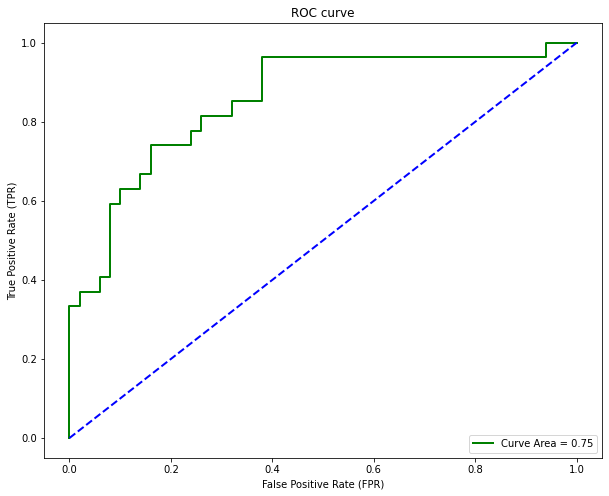

In [ ]:
FPR, TPR, thr = roc_curve(y_xgb_test['Outcome'], grid_result.predict_proba(X_xgb_test)[:,1])

auc_xgb_gscv = np.round(roc_auc_score(y_xgb_test['Outcome'], y_xgb_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(FPR, 
         TPR, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc_xgb_gscv))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": FPR, "TPR": TPR})
display(roc_data.head())

,threshold,FPR,TPR
0,1.969510,0.00,0.000000
1,0.969510,0.00,0.037037
2,0.825310,0.00,0.333333
3,0.790404,0.02,0.333333
4,0.783810,0.02,0.370370


## Ensemble Model Training

In [ ]:
# Bagged Decision Trees for Classification - necessary dependencies

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold

In [ ]:
# Copy Dataset
df_el = df.copy()

**Feature and target variable separation**

In [ ]:
X_el = df_el.drop('Outcome', axis=1)
Y_el = df_el[['Outcome']]

print("Features:" ,X_el.shape)
print("Targets:" ,Y_el.shape)

Features: (768, 8)
Targets: (768, 1)


### Decision Tree Classification

In [ ]:
from sklearn.model_selection import KFold

kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=7)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
results_dt_el = model_selection.cross_val_score(model, X_el, Y_el, cv=kfold)
print(results_dt_el.mean())
results_dt_el= results_dt_el.mean()

0.7578263841421736


**Performance metrics**

In [ ]:
accuracy_dt_el = model_selection.cross_val_score(model, X_el, Y_el, scoring='accuracy', cv=kfold).mean()
precision_dt_el = model_selection.cross_val_score(model, X_el, Y_el, scoring='precision', cv=kfold).mean()
recall_dt_el = model_selection.cross_val_score(model, X_el, Y_el, scoring='recall', cv=kfold).mean()
f1_dt_el = model_selection.cross_val_score(model, X_el, Y_el, scoring='f1', cv=kfold).mean()

print('Accuracy : ',accuracy_dt_el)
print('Precision : ',precision_dt_el)
print('Recall : ',recall_dt_el)
print('f1 Score : ',f1_dt_el)

Accuracy :  0.7578263841421736
Precision :  0.6725813648716874
Recall :  0.5881879876946254
f1 Score :  0.624894467784664


A Decision Tree classification (with 100 trees) which is wrapped itself in a Bagging-based Ensemble. The model giving an accuracy of 75.78% for 10-fold cross-validation.

### AdaBoost Classification

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 70
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results_ab_el = model_selection.cross_val_score(model, X_el, Y_el, cv=kfold)
print(results_ab_el.mean())
results_ab_el= results_ab_el.mean()

0.7604408749145593


**Performance metrics**

In [ ]:
accuracy_ab_el = model_selection.cross_val_score(model, X_el, Y_el, scoring='accuracy', cv=kfold).mean()
precision_ab_el = model_selection.cross_val_score(model, X_el, Y_el, scoring='precision', cv=kfold).mean()
recall_ab_el = model_selection.cross_val_score(model, X_el, Y_el, scoring='recall', cv=kfold).mean()
f1_ab_el = model_selection.cross_val_score(model, X_el, Y_el, scoring='f1', cv=kfold).mean()

print('Accuracy : ',accuracy_ab_el)
print('Precision : ',precision_ab_el)
print('Recall : ',recall_ab_el)
print('f1 Score : ',f1_ab_el)

Accuracy :  0.7604408749145593
Precision :  0.6678737400960956
Recall :  0.6083383178983484
f1 Score :  0.6322977486729148


An AdaBoost classification (with 70 trees) which is based on Boosting type of Ensembling. The model giving an accuracy of 76.04% for 10-fold cross-validation.

### Voting Ensemble for Classification

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
# create the sub models
seed = 7
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results_ve_el = model_selection.cross_val_score(ensemble, X_el, Y_el, cv=kfold)
print(results_ve_el.mean())
results_ve_el= results_ve_el.mean()

0.7721633629528367


**Performance metrics**

In [ ]:
accuracy_ve_el = model_selection.cross_val_score(ensemble, X_el, Y_el, scoring='accuracy', cv=kfold).mean()
precision_ve_el = model_selection.cross_val_score(ensemble, X_el, Y_el, scoring='precision', cv=kfold).mean()
recall_ve_el = model_selection.cross_val_score(ensemble, X_el, Y_el, scoring='recall', cv=kfold).mean()
f1_ve_el = model_selection.cross_val_score(ensemble, X_el, Y_el, scoring='f1', cv=kfold).mean()

print('Accuracy : ',accuracy_ve_el)
print('Precision : ',precision_ve_el)
print('Recall : ',recall_ve_el)
print('f1 Score : ',f1_ve_el)

Accuracy :  0.7708646616541354
Precision :  0.7493809892378003
Recall :  0.5216086436567163
f1 Score :  0.6006084719172415


A Voting based Ensemble model where Logistic Regression, Decision Tree and Support Vector Machine models are trained for voting purpose. The model performed the best so far with an accuracy of 77.34% for 10-fold cross-validation.

# Results 

## Result: Traditional Model Training

### Before Grid Search &  Cross Validation with Hyperparameter Tuning

#### New Dataframe Create

In [ ]:
result_data = {'Algorithms':['Logistic Regression', 'Decision Tree', 'SVM', 'Random Forest', 'Gaussian Naive Bayes', 'KNN', 'XGBoost'],
        'Accuracy': [np.round(accuracy_lr*100, 2), np.round(accuracy_dtc*100, 2), np.round(accuracy_svm*100, 2), np.round(accuracy_rfc*100, 2), np.round(accuracy_gnb*100, 2), np.round(accuracy_knn*100, 2), np.round(accuracy_xgb*100, 2)],
        'Precision': [np.round(precision_lr*100, 2), np.round(precision_dtc*100, 2), np.round(precision_svm*100, 2), np.round(precision_rfc*100, 2), np.round(precision_gnb*100, 2), np.round(precision_knn*100, 2), np.round(precision_xgb*100, 2)],
        'Recall': [np.round(recall_lr*100, 2), np.round(recall_dtc*100, 2), np.round(recall_svm*100, 2), np.round(recall_rfc*100, 2), np.round(recall_gnb*100, 2), np.round(recall_knn*100, 2), np.round(recall_xgb*100, 2)],
        'F1 Score': [np.round(f1_score_lr*100, 2), np.round(f1_score_dtc*100, 2), np.round(f1_score_svm*100, 2), np.round(f1_score_rfc*100, 2), np.round(f1_score_gnb*100, 2), np.round(f1_score_knn*100, 2), np.round(f1_score_xgb*100, 2)],
        'Harmonic Mean': [np.round(HarmonicMean_lr*100, 2), np.round(HarmonicMean_dtc*100, 2), np.round(HarmonicMean_svm*100, 2), np.round(HarmonicMean_rfc*100, 2), np.round(HarmonicMean_gnb*100, 2), np.round(HarmonicMean_knn*100, 2), np.round(HarmonicMean_xgb*100, 2)],
        'Specificity': [np.round(Specificity_lr*100, 2), np.round(Specificity_dtc*100, 2), np.round(Specificity_svm*100, 2), np.round(Specificity_rfc*100, 2), np.round(Specificity_gnb*100, 2), np.round(Specificity_knn*100, 2), np.round(Specificity_xgb*100, 2)],
        'AUC': [np.round(auc_lr*100, 2), np.round(auc_dtc*100, 2), np.round(auc_svm*100, 2), np.round(auc_rfc*100, 2), np.round(auc_gnb*100, 2), np.round(auc_knn*100, 2), np.round(auc_xgb*100, 2)]}

# Creates pandas DataFrame.
result_df = pd.DataFrame(result_data)

# Display result_df
display(result_df)

,Algorithms,Accuracy,Precision,Recall,F1 Score,Harmonic Mean,Specificity,AUC
0,Logistic Regression,79.22,76.0,59.0,67.0,66.43,90.0,75.0
1,Decision Tree,76.62,68.0,63.0,65.0,65.40,84.0,73.0
2,SVM,77.92,75.0,56.0,64.0,64.12,90.0,73.0
3,Random Forest,75.32,63.0,70.0,67.0,66.32,78.0,74.0
4,Gaussian Naive Bayes,77.92,71.0,63.0,67.0,66.76,86.0,74.0
5,KNN,72.73,64.0,52.0,57.0,57.38,84.0,68.0
6,XGBoost,79.22,72.0,67.0,69.0,69.41,86.0,76.0


####  Bar Plot

Text(0, 0.5, 'Percent of performance (%)')

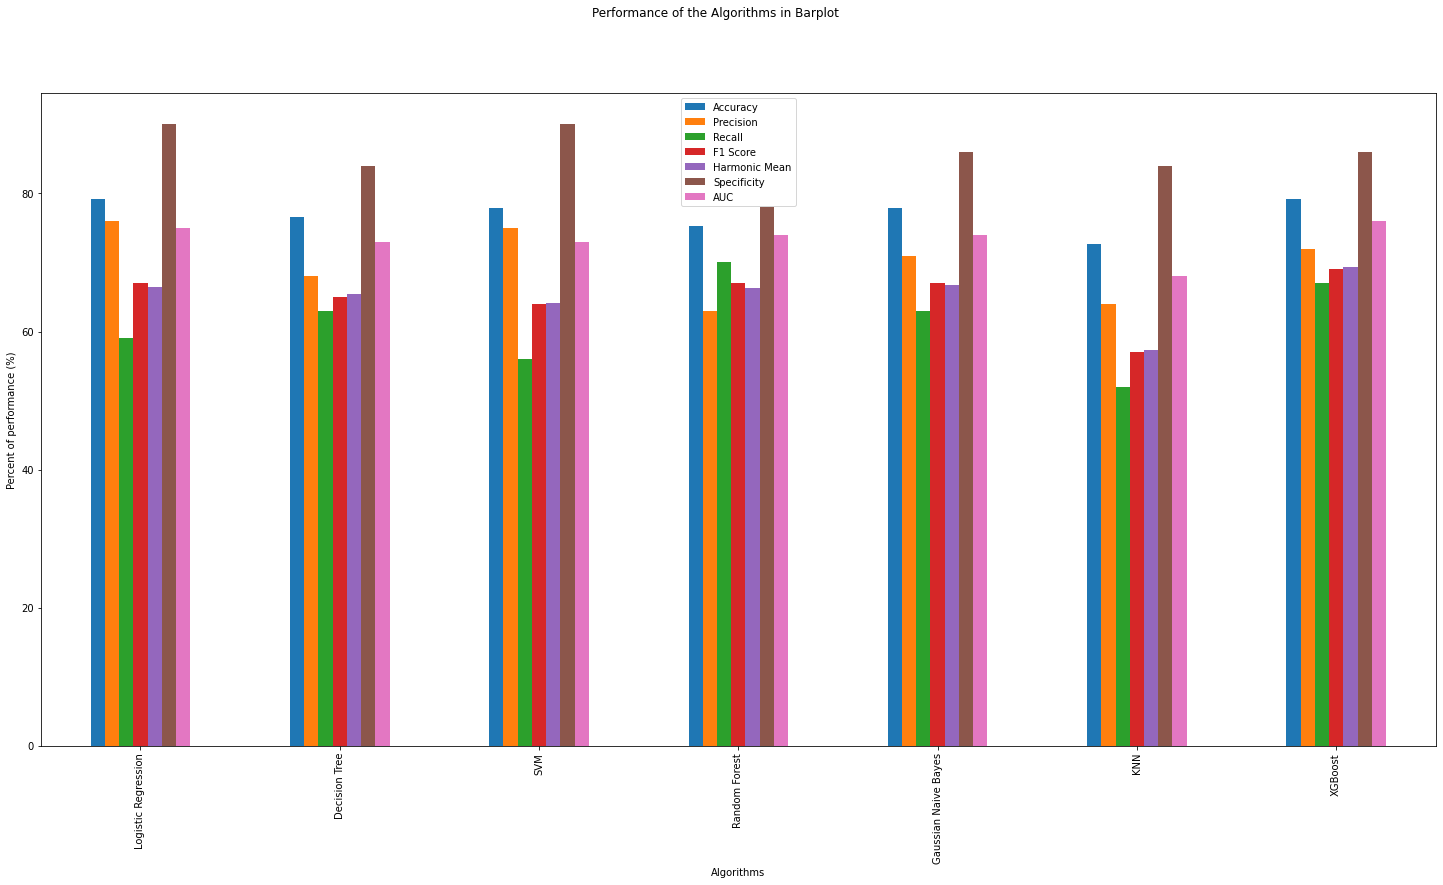

In [ ]:
# importing pandas library
import pandas as pd
# import matplotlib library
import matplotlib.pyplot as plt
  
# plotting graph
result_df.plot(x="Algorithms", 
               y=["Accuracy", "Precision", "Recall", "F1 Score", "Harmonic Mean", "Specificity", "AUC"], 
               kind="bar", figsize=(25, 12))

plt.suptitle("Performance of the Algorithms in Barplot\n\n\n\n\n\n")
plt.ylabel("Percent of performance (%)")

### After Grid Search &  Cross Validation with Hyperparameter Tuning

####  New Dataframe Create

In [ ]:
result_data_gscv = {'Algorithms':['Logistic Regression', 'Decision Tree', 'SVM', 'Random Forest', 'Gaussian Naive Bayes', 'KNN', 'XGBoost'],
        'Accuracy': [np.round(accuracy_lr_gscv*100, 2), np.round(accuracy_dtc_gscv*100, 2), np.round(accuracy_svm_gscv*100, 2), np.round(accuracy_rfc_gscv*100, 2), np.round(accuracy_gnb_gscv*100, 2), np.round(accuracy_knn_gscv*100, 2), np.round(accuracy_xgb_gscv*100, 2)],
        'Precision': [np.round(precision_lr_gscv*100, 2), np.round(precision_dtc_gscv*100, 2), np.round(precision_svm_gscv*100, 2), np.round(precision_rfc_gscv*100, 2), np.round(precision_gnb_gscv*100, 2), np.round(precision_knn_gscv*100, 2), np.round(precision_xgb_gscv*100, 2)],
        'Recall': [np.round(recall_lr_gscv*100, 2), np.round(recall_dtc_gscv*100, 2), np.round(recall_svm_gscv*100, 2), np.round(recall_rfc_gscv*100, 2), np.round(recall_gnb_gscv*100, 2), np.round(recall_knn_gscv*100, 2), np.round(recall_xgb_gscv*100, 2)],
        'F1 Score': [np.round(f1_score_lr_gscv*100, 2), np.round(f1_score_dtc_gscv*100, 2), np.round(f1_score_svm_gscv*100, 2), np.round(f1_score_rfc_gscv*100, 2), np.round(f1_score_gnb_gscv*100, 2), np.round(f1_score_knn_gscv*100, 2), np.round(f1_score_xgb_gscv*100, 2)],
        'Harmonic Mean': [np.round(HarmonicMean_lr_gscv*100, 2), np.round(HarmonicMean_dtc_gscv*100, 2), np.round(HarmonicMean_svm_gscv*100, 2), np.round(HarmonicMean_rfc_gscv*100, 2), np.round(HarmonicMean_gnb_gscv*100, 2), np.round(HarmonicMean_knn_gscv*100, 2), np.round(HarmonicMean_xgb_gscv*100, 2)],
        'Specificity': [np.round(Specificity_lr_gscv*100, 2), np.round(Specificity_dtc_gscv*100, 2), np.round(Specificity_svm_gscv*100, 2), np.round(Specificity_rfc_gscv*100, 2), np.round(Specificity_gnb_gscv*100, 2), np.round(Specificity_knn_gscv*100, 2), np.round(Specificity_xgb_gscv*100, 2)],
        'AUC': [np.round(auc_lr_gscv*100, 2), np.round(auc_dtc_gscv*100, 2), np.round(auc_svm_gscv*100, 2), np.round(auc_rfc_gscv*100, 2), np.round(auc_gnb_gscv*100, 2), np.round(auc_knn_gscv*100, 2), np.round(auc_xgb_gscv*100, 2)]}

# Creates pandas DataFrame.
result_df_gscv = pd.DataFrame(result_data_gscv)

# Display result_df
display(result_df_gscv)

,Algorithms,Accuracy,Precision,Recall,F1 Score,Harmonic Mean,Specificity,AUC
0,Logistic Regression,78.0,67.0,74.0,70.0,70.33,80.0,77.0
1,Decision Tree,82.0,78.0,67.0,72.0,67.50,90.0,78.0
2,SVM,74.0,68.0,48.0,57.0,56.28,88.0,77.0
3,Random Forest,74.0,67.0,52.0,58.0,58.55,86.0,69.0
4,Gaussian Naive Bayes,78.0,71.0,63.0,67.0,66.76,86.0,74.0
5,KNN,74.0,67.0,52.0,58.0,58.55,86.0,69.0
6,XGBoost,79.0,74.0,63.0,68.0,68.06,88.0,75.0


####  Bar Plot

Text(0, 0.5, 'Percent of performance (%)')

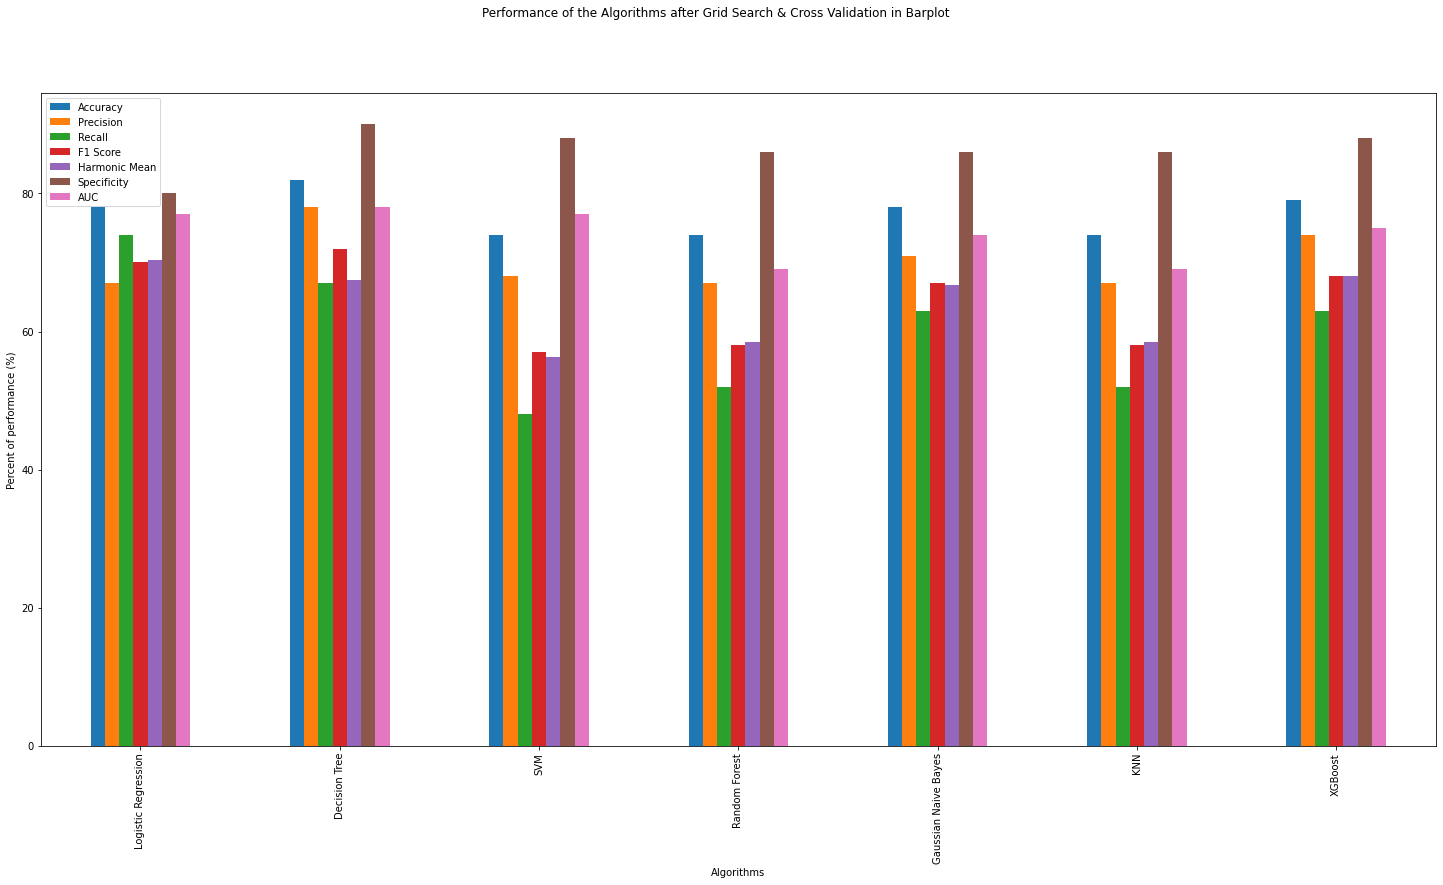

In [ ]:
# importing pandas library
import pandas as pd
# import matplotlib library
import matplotlib.pyplot as plt
  
# plotting graph
result_df_gscv.plot(x="Algorithms", 
               y=["Accuracy", "Precision", "Recall", "F1 Score", "Harmonic Mean", "Specificity", "AUC"], 
               kind="bar", figsize=(25, 12))
plt.suptitle("Performance of the Algorithms after Grid Search & Cross Validation in Barplot\n\n\n\n\n\n")
plt.ylabel("Percent of performance (%)")

## Result:  Ensemble Model Training

####  New Dataframe Create

In [ ]:
result_data_el = {'Algorithms':['Decision Tree Classification', 'AdaBoost Classification', 'Voting Ensemble'],
        'cross_val_score (Default)': [np.round(results_dt_el*100, 2), np.round(results_ab_el*100, 2), np.round(results_ve_el*100, 2)],
        'Accuracy': [np.round(accuracy_dt_el*100, 2), np.round(accuracy_ab_el*100, 2), np.round(accuracy_ve_el*100, 2)],
        'Precision': [np.round(precision_dt_el*100, 2), np.round(precision_ab_el*100, 2), np.round(precision_ve_el*100, 2)],
        'Recall': [np.round(recall_dt_el*100, 2), np.round(recall_ab_el*100, 2), np.round(recall_ve_el*100, 2)],
        'F1 Score': [np.round(f1_dt_el*100, 2), np.round(f1_ab_el*100, 2), np.round(f1_ve_el*100, 2)]}

# Creates pandas DataFrame.
result_el = pd.DataFrame(result_data_el)

# Display result_df
display(result_el)

,Algorithms,cross_val_score (Default),Accuracy,Precision,Recall,F1 Score
0,Decision Tree Classification,75.78,75.78,67.26,58.82,62.49
1,AdaBoost Classification,76.04,76.04,66.79,60.83,63.23
2,Voting Ensemble,77.22,77.09,74.94,52.16,60.06


#### Bar Plot

Text(0, 0.5, 'Percent of performance (%)')

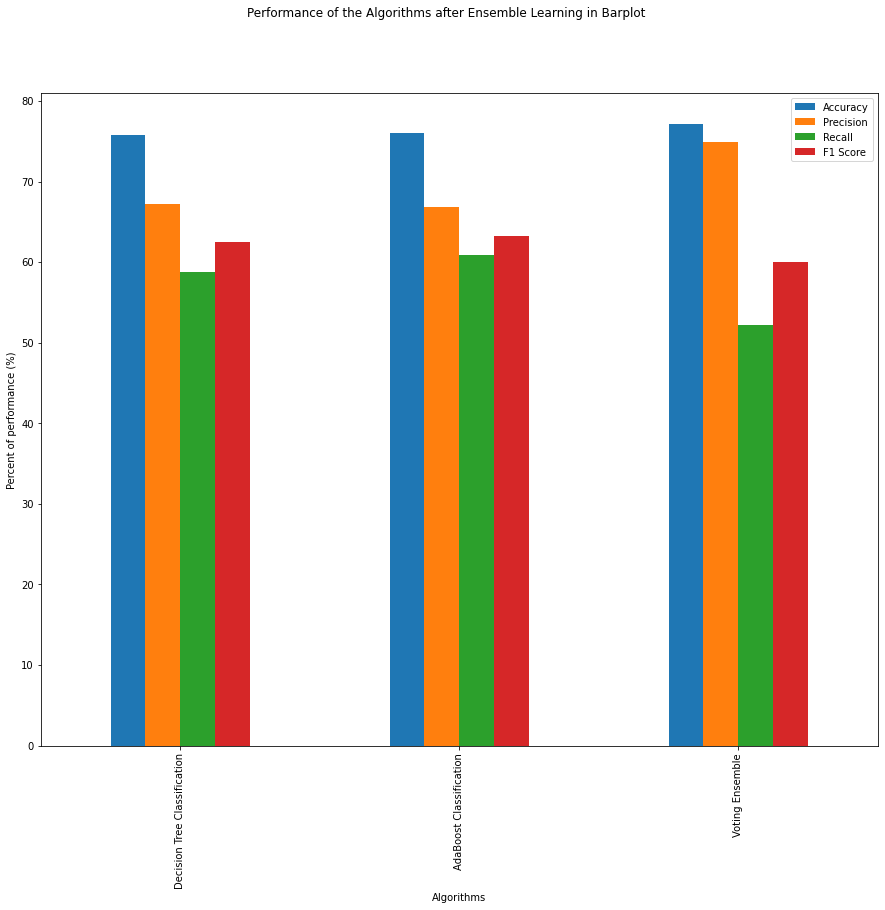

In [ ]:
# importing pandas library
import pandas as pd
# import matplotlib library
import matplotlib.pyplot as plt
  
# plotting graph
result_el.plot(x="Algorithms", 
               y=["Accuracy", "Precision", "Recall", "F1 Score"], 
               kind="bar", figsize=(15, 12))
plt.suptitle("Performance of the Algorithms after Ensemble Learning in Barplot\n\n\n\n\n\n")
plt.ylabel("Percent of performance (%)")